## Proposed Problem Statement

### Creating a Prediction Model for Real Estate Agents to predict HDB Resale Prices
Scenario
- You are assisting the Real Estate Agents in identifying:
- Which structural factors most drive prices,
- Which towns are becoming unaffordable fastest,
- Which flat characteristics need intervention (e.g., older flats with steep depreciation).


### Deliverables
An interactive prediction model where Real Estate Agents ... (tbc)

- Towns where remaining lease has the steepest price penalty.
- Flat types most sensitive to market fluctuations.
- Predictive model that flags likely future affordability issues.


Deliverable Form:
- Affordability & Price Driver Insights (EDA Findings) - Graphs and commentary

- Predictive Model for Resale Prices - ML Intepretable Model and ML Metrics

In [7]:
from pathlib import Path
print(Path("Tommy Ver(main)_updated.ipynb").resolve())


/Users/hz/Desktop/DAC/Group 5 Internal Project/Tommy Ver(main)_updated.ipynb


## STEP 1: DATA LOADING AND CLEANING

Load Libraries (Importing Foundational Libraries)


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Importing Key Functions

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Loading Dataset

In [10]:
# Load dataset
df = pd.read_csv('HDB_Resale_Prices.csv')

Using df.head() and df.sample() to get a quick look into Dataset

In [11]:
# Quick view of first 10 rows of Dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [12]:
# Quick view of random 10 rows of Dataset
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
156072,2023-06,WOODLANDS,3 ROOM,17,MARSILING LANE,10 TO 12,75.0,Improved,1984,60 years 05 months,365000.0
1775,2017-02,PASIR RIS,EXECUTIVE,651,PASIR RIS DR 10,10 TO 12,149.0,Apartment,1995,77 years 07 months,550000.0
33599,2018-08,JURONG WEST,4 ROOM,945,JURONG WEST ST 91,07 TO 09,113.0,Model A,1989,69 years 11 months,348000.0
170803,2024-01,SEMBAWANG,4 ROOM,593A,MONTREAL LINK,07 TO 09,93.0,Model A,2015,90 years 03 months,535000.0
31501,2018-07,MARINE PARADE,4 ROOM,54,MARINE TER,04 TO 06,88.0,Improved,1975,55 years 07 months,513000.0
105532,2021-08,PUNGGOL,4 ROOM,308C,PUNGGOL WALK,13 TO 15,92.0,Premium Apartment,2016,93 years 08 months,550000.0
130226,2022-07,BUKIT MERAH,5 ROOM,13,JLN BT MERAH,04 TO 06,124.0,Improved,1996,73 years 04 months,790000.0
88645,2021-01,JURONG WEST,5 ROOM,743,JURONG WEST ST 73,04 TO 06,122.0,Improved,1992,70 years 08 months,400000.0
176075,2024-04,BEDOK,4 ROOM,78,BEDOK NTH RD,13 TO 15,92.0,New Generation,1978,53 years 03 months,503000.0
5101,2017-04,KALLANG/WHAMPOA,4 ROOM,124,MCNAIR RD,07 TO 09,83.0,Simplified,1987,69 years 02 months,450000.0


Using df.shape, df.info and df.describe to understand Data

In [13]:
df.shape # Pulls number of rows and cols (r,c)

(194170, 11)

In [14]:
df.info() # Pulls info overview of Dataframe -- take note of inconsistencies in Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [15]:
df.describe() # Shows stats summary for numerical values

,floor_area_sqm,lease_commence_date,resale_price
count,194170.000000,194170.000000,1.941700e+05
mean,97.032377,1996.159196,5.062432e+05
std,24.041678,14.129136,1.768102e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.750000e+05
75%,112.000000,2011.000000,6.050000e+05
max,366.700000,2021.000000,1.588000e+06


### 1.1 Tackling Duplicates and Null Values

Checking for Total No. of Duplicates using df.duplicated().sum()

In [16]:
df.duplicated().sum() # Checking for total number of duplicates -- Note after running code: Found that duplicates are present (Question: Is it normal for this Dataset?)

294

Solving Duplicates, is it meant to be there?

In [17]:
duplicate_rows = df[df.duplicated(keep=False)] # Create an inspectable subset of duplicated rows to check
duplicate_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192280,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
193189,2024-11,BUKIT PANJANG,5 ROOM,210,PETIR RD,07 TO 09,122.0,Improved,1988,62 years 08 months,650000.0


Analysing duplicate_rows subset

In [18]:
duplicate_counts = duplicate_rows.value_counts().reset_index(name='count')
duplicate_counts #Confirming 294 rows of duplicates , and showcasing how many counts of duplicates per type.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,count
0,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,2
1,2019-03,WOODLANDS,4 ROOM,824,WOODLANDS ST 81,04 TO 06,84.0,Simplified,1989,69 years 07 months,300000.0,2
2,2020-03,PUNGGOL,4 ROOM,672D,EDGEFIELD PLAINS,07 TO 09,90.0,Model A,2015,94 years 09 months,420000.0,2
3,2020-01,SENGKANG,4 ROOM,178B,RIVERVALE CRES,16 TO 18,93.0,Model A,2015,94 years 02 months,390000.0,2
4,2019-12,YISHUN,3 ROOM,741,YISHUN AVE 5,07 TO 09,67.0,New Generation,1985,64 years 01 month,282000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-08,BUKIT BATOK,5 ROOM,172,BT BATOK WEST AVE 8,16 TO 18,134.0,Model A,1985,66 years 10 months,470000.0,2
290,2017-08,BISHAN,4 ROOM,146,BISHAN ST 11,10 TO 12,84.0,Simplified,1987,69 years,470000.0,2
291,2017-08,BEDOK,5 ROOM,604,BEDOK RESERVOIR RD,04 TO 06,121.0,Improved,1982,63 years 09 months,470000.0,2
292,2017-08,BEDOK,4 ROOM,762,BEDOK RESERVOIR VIEW,07 TO 09,105.0,Premium Apartment,2000,82 years 04 months,470000.0,2


In [19]:
duplicate_rows.nunique() # Result shows that duplicates are generally very different across multiple categories

month                   72
town                    25
flat_type                6
block                  265
street_name            170
storey_range            12
floor_area_sqm          63
flat_model               9
lease_commence_date     47
remaining_lease        194
resale_price            96
dtype: int64

After analysing duplicates, as Dataset has not unique identifiers in each row (such as specific unit numbers): We will accept duplicates as valid.

Using df.columns to see each column name

In [20]:
df.columns # Pulls each column name

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Check for Missing Values (Nan)

In [21]:
# Checking missing values per column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [22]:
# Results show no missing column

In [23]:
#df.dropna(subset=['resale_price'], inplace=True)
#df.isna().sum()

In [24]:
# Results show 1 row dropped

### STEP 2: Exploratory Data Analysis (EDA)

Begin EDA - Categorising Columns by Numerical and Categorical

In [25]:
categorical_cols = df.select_dtypes(include='object').columns # Creating categorical columns by selecting Columns that are dtype ('object')
categorical_cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')

Understanding each Categorical Column and its unique values

In [26]:
for col in categorical_cols: # Pulling categorical columns, unique values per column and showing them in a presentabl format
    print("="*60)
    print(f"Column: {col}")
    print(f"Total unique values: {df[col].nunique()}")
    print("- Unique values:")
    print(df[col].unique())
    print("="*60 + "\n")

Column: month
Total unique values: 95
- Unique values:
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03'
 '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10'
 '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12'
 '2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07'
 '2024-08' '2024-09' '

In [27]:
numerical_cols = df.select_dtypes(include=np.number).columns # Creating a list of numerical columns by selecting Columns that are dtype ('np.numbers' = anything considered a numerical type by NumPy)
numerical_cols

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')

In [28]:
for num in numerical_cols:
    print("="*60)
    print(f"Column: {num}")
    print(f"Total unique values: {df[num].nunique()}")
    print("- Unique values:")
    print(df[num].unique())
    print("="*60 + "\n")

Column: floor_area_sqm
Total unique values: 178
- Unique values:
[ 44.   67.   68.   73.   74.   82.   81.   92.   91.   94.   98.   97.
  99.   90.  117.  119.  118.  112.  121.  147.   45.   59.   63.   70.
  60.   65.   75.   66.   84.   93.  104.  105.  120.  130.  132.  115.
 122.  137.  139.  143.  146.  145.  141.   64.   83.  108.   95.  123.
  69.  103.  102.  100.  107.   86.  101.  150.  155.  144.   34.   51.
  54.   58.   76.   88.   77.  106.   85.   89.  134.  110.  111.  151.
  55.  113.  126.  124.  131.  142.   42.   46.   56.   61.   57.   72.
 109.   47.   96.  116.  128.  140.  148.  156.  157.   71.   52.   79.
 129.  133.  125.   48.   62.  114.   87.  127.  161.  165.   50.  153.
  43.  138.  164.  163.  136.  149.   80.  154.  152.   37.   78.  135.
 170.  192.  182.   31.   49.   53.   60.3 176.  177.  189.   40.  166.
 184.  173.  169.  181.  158.   41.  159.  215.  174.   63.1 179.  162.
  83.1 172.  168.  160.  249.  185.   38.  178.  171.  237.  183.  190.

### STEP 2.1
- price_per_sqm = resale_price / floor_area_sqm
- flat_age = trans_year - lease_commence_date
- changing remaining_lease (string/object) into remaining_lease_years (float)

Price Per SQM Column
- Important feature to have as it puts resale_price into scale for different sized flats

In [29]:
df_upd = df.copy()
df_upd['price_per_sqm'] = df_upd['resale_price'] / df_upd['floor_area_sqm']
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm
188816,2024-09,BISHAN,EXECUTIVE,238,BISHAN ST 22,01 TO 03,146.0,Maisonette,1992,66 years 11 months,1200000.0,8219.178082
123968,2022-04,CLEMENTI,4 ROOM,311C,CLEMENTI AVE 4,07 TO 09,80.0,DBSS,2014,91 years 09 months,715000.0,8937.500000
127266,2022-05,TAMPINES,4 ROOM,807,TAMPINES AVE 4,10 TO 12,104.0,Model A,1984,61 years,545000.0,5240.384615
192185,2024-10,SEMBAWANG,3 ROOM,128B,CANBERRA ST,07 TO 09,68.0,Model A,2018,93 years 01 month,510000.0,7500.000000
29615,2018-06,SENGKANG,4 ROOM,408B,FERNVALE RD,16 TO 18,95.0,Premium Apartment,2004,85 years 02 months,394000.0,4147.368421
106315,2021-08,TOA PAYOH,3 ROOM,101,POTONG PASIR AVE 1,04 TO 06,74.0,Model A,1984,62 years 02 months,430000.0,5810.810811
61804,2019-11,SENGKANG,5 ROOM,440A,FERNVALE LINK,19 TO 21,113.0,Improved,2015,94 years 08 months,580000.0,5132.743363
139478,2022-11,CHOA CHU KANG,4 ROOM,815A,CHOA CHU KANG AVE 7,01 TO 03,93.0,Model A,2017,93 years 05 months,480000.0,5161.290323
151869,2023-04,TOA PAYOH,4 ROOM,191,LOR 4 TOA PAYOH,01 TO 03,84.0,Improved,1974,50 years 04 months,493000.0,5869.047619
9527,2017-06,WOODLANDS,4 ROOM,436,WOODLANDS ST 41,10 TO 12,84.0,Simplified,1996,78 years 02 months,310000.0,3690.476190


Flat Age (trans_year) - (remaining_lease_years)
- Add Transaction Year ('trans_year') into the Dataframe from datetime Column 'Month'
- Add in Flat Age : Easier feature to analyse when it comes to 'age' of flat / longevity / lifespan

In [30]:
# Extract the transaction year from the 'month' column
df_upd['trans_year'] = pd.to_datetime(df_upd['month']).dt.year

# Calculate flat_age
df_upd['flat_age'] = df_upd['trans_year'] - df_upd['lease_commence_date']

# Display a sample of the updated DataFrame with the new 'flat_age' column
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age
129341,2022-06,TAMPINES,3 ROOM,411,TAMPINES ST 41,04 TO 06,69.0,Improved,1985,62 years 03 months,400000.0,5797.101449,2022,37
61878,2019-11,TAMPINES,3 ROOM,202,TAMPINES ST 21,07 TO 09,75.0,Model A,1983,63 years 01 month,305000.0,4066.666667,2019,36
145619,2023-01,WOODLANDS,4 ROOM,691C,WOODLANDS DR 73,01 TO 03,93.0,Model A,2018,94 years 06 months,548000.0,5892.473118,2023,5
78103,2020-09,BEDOK,5 ROOM,748A,BEDOK RESERVOIR CRES,07 TO 09,105.0,DBSS,2014,93 years,782000.0,7447.619048,2020,6
131334,2022-07,SEMBAWANG,5 ROOM,417,CANBERRA RD,10 TO 12,110.0,Improved,2001,77 years 09 months,530200.0,4820.000000,2022,21
62910,2019-12,CHOA CHU KANG,5 ROOM,225,CHOA CHU KANG CTRL,07 TO 09,124.0,Improved,1993,72 years 06 months,468000.0,3774.193548,2019,26
26625,2018-05,BEDOK,5 ROOM,103,LENGKONG TIGA,10 TO 12,125.0,Improved,1989,69 years 08 months,780000.0,6240.000000,2018,29
190825,2024-10,ANG MO KIO,3 ROOM,462,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,54 years 05 months,385000.0,5661.764706,2024,44
123332,2022-04,ANG MO KIO,5 ROOM,458,ANG MO KIO AVE 10,16 TO 18,120.0,Improved,1980,56 years 09 months,618000.0,5150.000000,2022,42
36512,2018-09,WOODLANDS,3 ROOM,6,MARSILING DR,13 TO 15,65.0,Improved,1976,56 years 04 months,218000.0,3353.846154,2018,42


Making Remaining Lease Years into a Float Dtype
- Measures Remaining Lease by Years instead of String / Object

In [31]:
def parse_remaining_lease(lease_str):
    if pd.isna(lease_str):
        return np.nan

    parts = lease_str.replace('years', '').replace('year', '').replace('months', '').replace('month', '').split()
    years = 0
    months = 0

    if len(parts) >= 1 and parts[0].isdigit():
        years = int(parts[0])
    # Check if months part exists and is a digit. It might be at index 1 or 2 depending on 'years' presence.
    if len(parts) == 2 and parts[1].isdigit(): # Case like '60 years'
        pass # months remains 0
    elif len(parts) == 3 and parts[2].isdigit(): # Case like '60 years 07 months'
        months = int(parts[1])
    elif len(parts) == 2 and parts[1] == 'months': # Case like '07 months'
        months = int(parts[0])

    return float(years + months / 12)

# Apply the parsing function to 'remaining_lease' in df_upd
df_upd['remaining_lease_years'] = df_upd['remaining_lease'].apply(parse_remaining_lease)
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
156960,2023-07,GEYLANG,5 ROOM,123,PAYA LEBAR WAY,01 TO 03,118.0,Improved,1980,56 years 03 months,628000.0,5322.033898,2023,43,56.0
115297,2021-12,JURONG WEST,5 ROOM,660C,JURONG WEST ST 64,10 TO 12,110.0,Improved,2001,78 years 10 months,592888.0,5389.890909,2021,20,78.0
97813,2021-05,JURONG WEST,3 ROOM,484,JURONG WEST AVE 1,04 TO 06,67.0,New Generation,1985,63 years 03 months,290000.0,4328.358209,2021,36,63.0
36493,2018-09,TOA PAYOH,4 ROOM,156,LOR 1 TOA PAYOH,07 TO 09,101.0,Model A,1999,79 years 05 months,692000.0,6851.485149,2018,19,79.0
115884,2021-12,SENGKANG,4 ROOM,468B,FERNVALE LINK,04 TO 06,93.0,Model A,2016,93 years 09 months,458000.0,4924.731183,2021,5,93.0
86223,2020-12,JURONG WEST,5 ROOM,321,TAH CHING RD,19 TO 21,121.0,Improved,1997,75 years 09 months,550000.0,4545.454545,2020,23,75.0
84838,2020-11,TOA PAYOH,4 ROOM,12,JOO SENG RD,01 TO 03,113.0,Model A,1984,62 years 07 months,443000.0,3920.353982,2020,36,62.0
69582,2020-03,YISHUN,3 ROOM,172,YISHUN AVE 7,10 TO 12,64.0,Simplified,1988,67 years 04 months,253000.0,3953.125000,2020,32,67.0
18749,2017-11,WOODLANDS,5 ROOM,763,WOODLANDS AVE 6,07 TO 09,122.0,Improved,1998,79 years 05 months,363000.0,2975.409836,2017,19,79.0
26944,2018-05,CHOA CHU KANG,5 ROOM,661,CHOA CHU KANG CRES,07 TO 09,121.0,Premium Apartment,1999,79 years 11 months,400888.0,3313.123967,2018,19,79.0


### Dropping Columns from the Dataframe
- Dropping Remaining_Lease (string)

In [32]:
df_upd = df_upd.drop('remaining_lease', axis=1)
display(df_upd.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


## STEP 3.1: The Overview of the HDB Resale Market


### Understanding the Current State of the HDB Resale Market



## Market Health & Affordability
- What is the current price landscape?
- Is the marketing becoming More or Less affordable?
- What are people buying? What types of flats are most popular?

### What is the current price landscape?
- Resale Price Distribution Nationwide
- Median Price per **sqm**

### Resale Price Distribution Nationwide

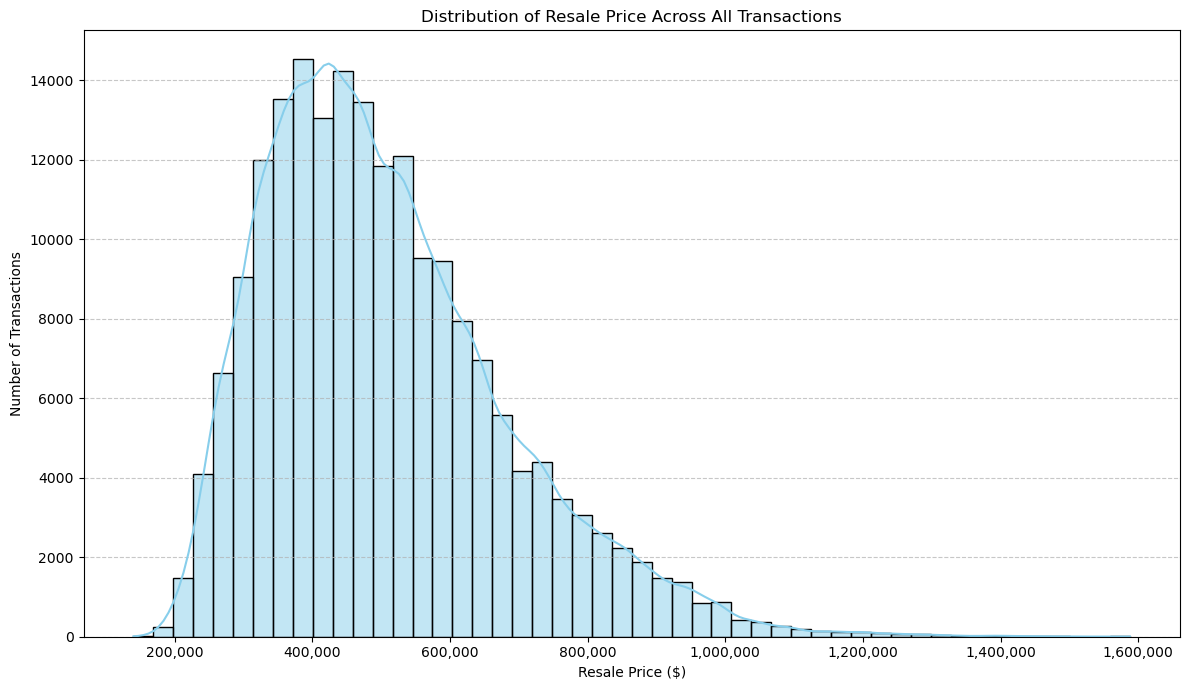

In [33]:
plt.figure(figsize=(12, 7))
sns.histplot(df_upd['resale_price'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Price Across All Transactions')
plt.xlabel('Resale Price ($)')
plt.ylabel('Number of Transactions')

# Format x-axis to display readable numbers
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Results from Histogram:
- Right-skewed distribution = Higher no. of transactions at the lower resale price.
- Presence of higher resale price are rarer.
- Median is a better measure as compared to Mean due to outliers

What it means for the HDB Market?
- Most demand falls under the flats that lie within the $400,000 range.


### Number of Transactions Over Time - Is the Demand increasing?

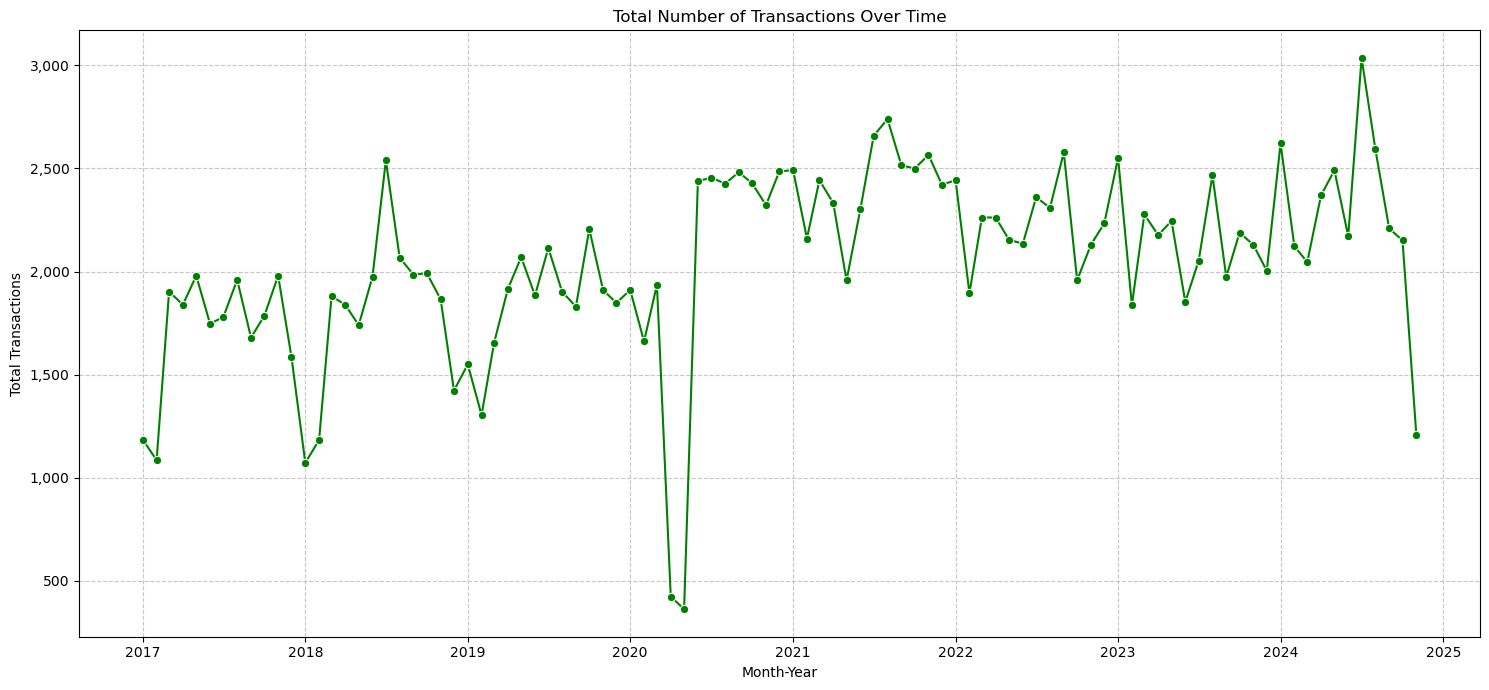

In [34]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Count total transactions per month
transaction_counts = df_upd.groupby('month').size().reset_index(name='total_transactions')

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='total_transactions', data=transaction_counts, marker='o', color='green')

plt.title('Total Number of Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Transactions')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Median Price Analysis
- What is the Median Price Overall
- What is the Median Price per SQM Overall

In [35]:
median_resale_price = df_upd['resale_price'].median()
median_price_per_sqm = df_upd['price_per_sqm'].median()

print(f"Median Resale Price across All Transactions: ${median_resale_price:,.2f}")
print(f"Median Price Per SQM across All Transactions: ${median_price_per_sqm:,.2f}")


Median Resale Price across All Transactions: $475,000.00
Median Price Per SQM across All Transactions: $5,000.00


### Is the HDB Resale Market getting MORE or LESS Affordable?

- Median Per Sqm Price Over-time

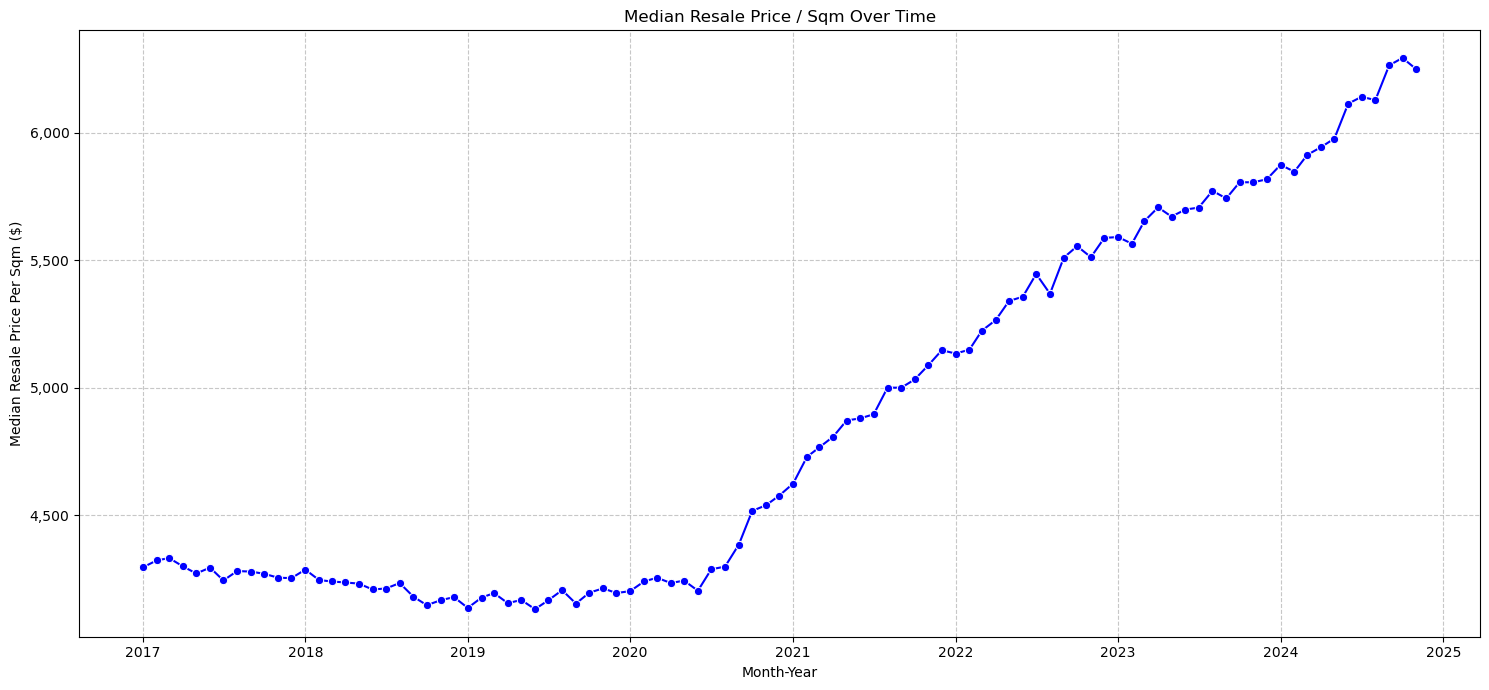

In [36]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median resale price per sqm per month
median_price_per_sqm_over_time = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='price_per_sqm', data=median_price_per_sqm_over_time, marker='o', color='blue')

plt.title('Median Resale Price / Sqm Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculate Inflation Rate for Median Per Sqm Price from 2020 onwards

In [37]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Recalculate median price per sqm per month
median_price_per_sqm_overtime = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

# Filter data for the years 2020 to 2025
filtered_median_per_sqm_yearly = median_price_per_sqm_overtime[
    (median_price_per_sqm_overtime['month'].dt.year >= 2020) &
    (median_price_per_sqm_overtime['month'].dt.year <= 2025)
].copy()

# Resample to get yearly median prices. Taking the median of the monthly medians for each year.
yearly_median_sqm_price = filtered_median_per_sqm_yearly.set_index('month').resample('YE')['price_per_sqm'].median().reset_index()
yearly_median_sqm_price['year'] = yearly_median_sqm_price['month'].dt.year

# Calculate the annual inflation rate (percentage change year over year)
yearly_median_sqm_price['inflation_rate_pps'] = yearly_median_sqm_price['price_per_sqm'].pct_change() * 100

print("Annual Inflation Rate of Median Price Per Sqm (2020-2025):")
display(yearly_median_sqm_price[['year', 'price_per_sqm', 'inflation_rate_pps']].round(2))

Annual Inflation Rate of Median Price Per Sqm (2020-2025):


,year,price_per_sqm,inflation_rate_pps
0,2020,4270.33,NaN
1,2021,4887.65,14.46
2,2022,5363.00,9.73
3,2023,5707.44,6.42
4,2024,6115.11,7.14


Long-term Trend - Compound Annual Growth Rate (CAGR)



In [38]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate yearly median resale price
yearly_median_resale_price_overall = df_upd.groupby(df_upd['month'].dt.year)['resale_price'].median().reset_index()
yearly_median_resale_price_overall.columns = ['year', 'median_resale_price']

# Calculate yearly median price per sqm
yearly_median_price_per_sqm_overall = df_upd.groupby(df_upd['month'].dt.year)['price_per_sqm'].median().reset_index()
yearly_median_price_per_sqm_overall.columns = ['year', 'median_price_per_sqm']

# Define start and end years
start_year = 2017
end_year = yearly_median_resale_price_overall['year'].max() # Get the latest year from the data

# Filter for start and end years
start_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == start_year]['median_resale_price'].iloc[0]
end_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == end_year]['median_resale_price'].iloc[0]

start_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == start_year]['median_price_per_sqm'].iloc[0]
end_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == end_year]['median_price_per_sqm'].iloc[0]

# Calculate number of periods
num_years = end_year - start_year

# Calculate CAGR for Median Resale Price
cagr_resale_price = ((end_price / start_price)**(1/num_years) - 1) * 100

# Calculate CAGR for Median Price Per Sqm
cagr_price_per_sqm = ((end_price_per_sqm / start_price_per_sqm)**(1/num_years) - 1) * 100


print(f"CAGR of Median Price Per Sqm ({start_year}-{end_year}): {cagr_price_per_sqm:.2f}%")

CAGR of Median Price Per Sqm (2017-2024): 5.11%


### Findings:
- Overall Median Prices over time show an upward trend from 2020 onwards
- However, since 2020, Price Inflation has been showing decreasing trends
- CAGR of Median Prices are around 5%, meaning as of the 2020, the Inflation Rate is still increasing at a greater rate than the CAGR --> **Indicative of Housing becoming Less Affordable.**


## STEP 3.2: STRUCTURAL DRIVERS
- What are the sturctural / physical factors of the houses that people are buying and why are they buying them?


### What are people buying?
- What _______ is most transacted?
  1. Flat Type
  2. Flat Size
  3. Flat Model

  

Flat Type Distribution

Number of flats per flat_type:


flat_type
4 ROOM              81967
5 ROOM              48091
3 ROOM              46071
EXECUTIVE           14301
2 ROOM               3586
MULTI-GENERATION       80
1 ROOM                 74
Name: count, dtype: int64

/var/folders/ky/xjbwfjhd2sl24vckhp8swkd40000gn/T/ipykernel_61965/2508281703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)


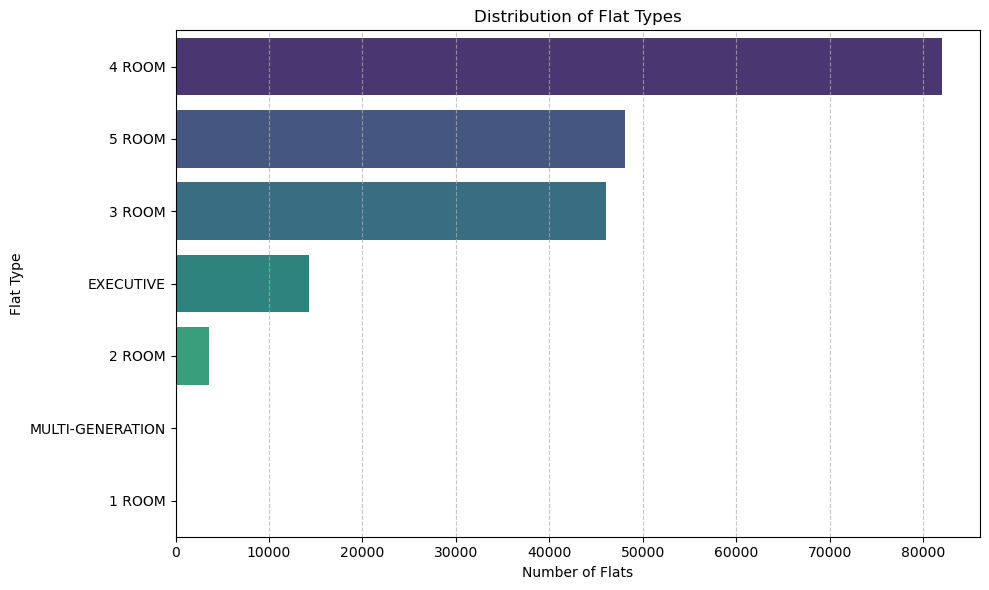

In [39]:
print("Number of flats per flat_type:")
display(df_upd['flat_type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Flat Types')
plt.xlabel('Number of Flats')
plt.ylabel('Flat Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Findings:
- Most Popular Flat Types:
  1. 4 Room (81967)
  2. 5 Room (48091)
  3. 3 Room (46071)
  4. Exec (14301)

- Most Popular Flat Size (floor_area_sqm):
  1. 93 (15507)
  2. 92 (12225)
  3. 67 (11834)
  4. 110 (8907)

> This is overall is indicative of the Supply and Demand in the Housing Market

#### How does Flat Type / Flat Model affect Pricing?

Median Resale Price Per Sqm Over Time by Flat Type
- Informs us on price trends specific to flat type over the years
- Which flat types are becoming more / less affordable

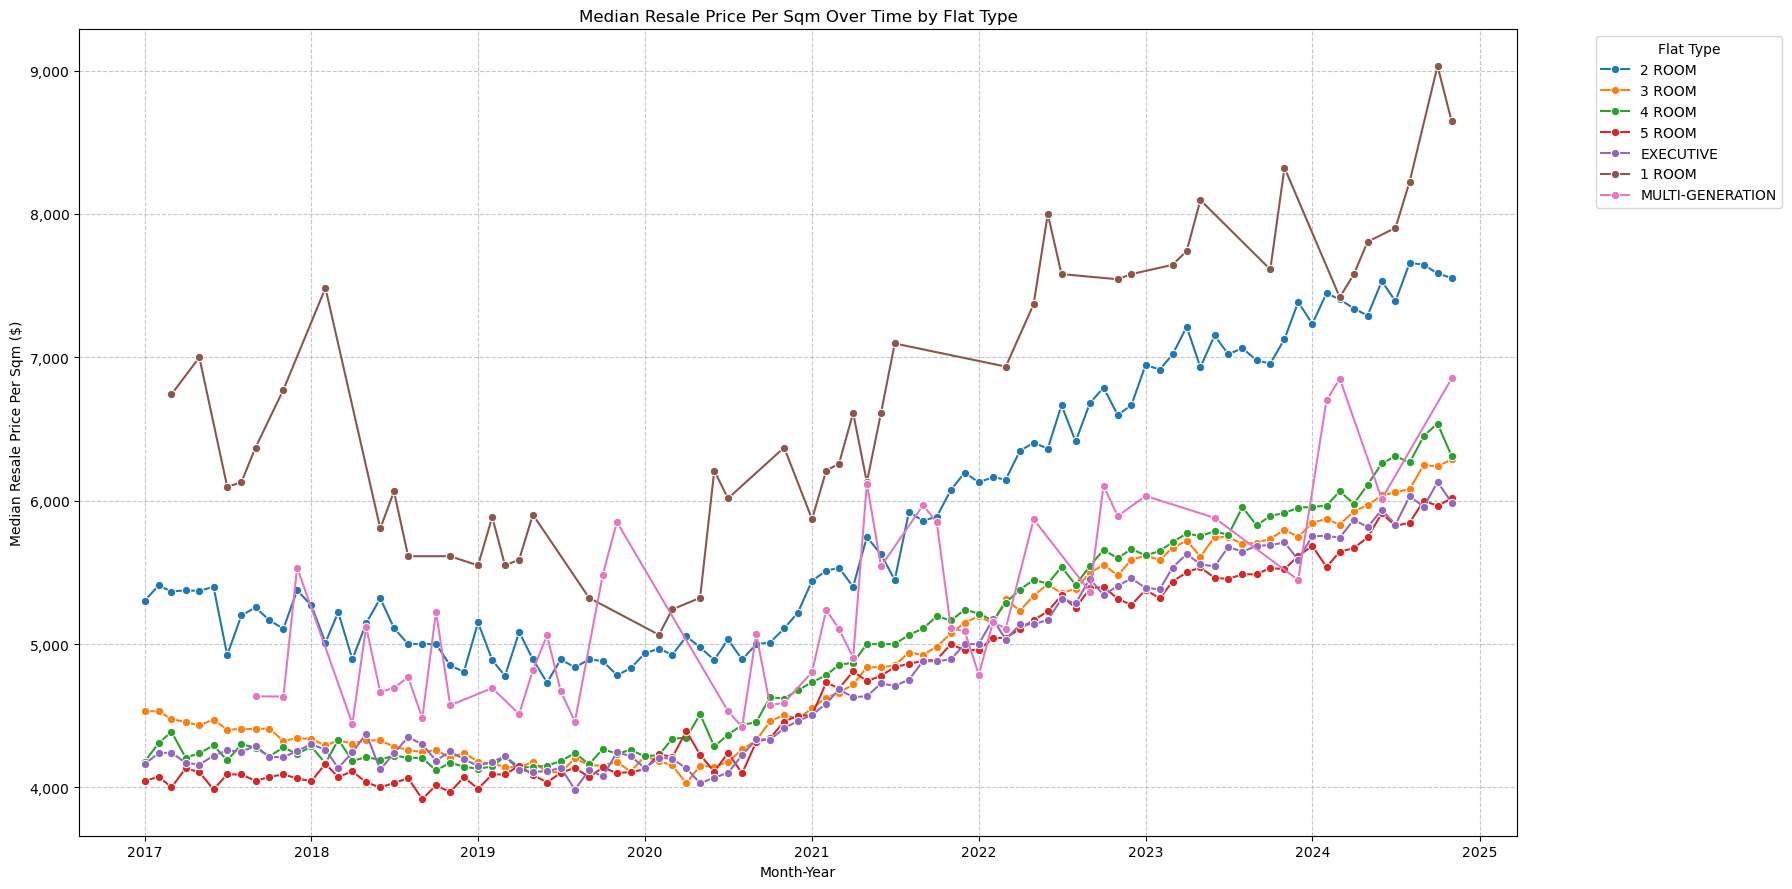

In [40]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median price_per_sqm per month for each flat_type
median_price_per_sqm_by_flat_type_over_time = df_upd.groupby(['month', 'flat_type'])['price_per_sqm'].median().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(x='month', y='price_per_sqm', hue='flat_type', data=median_price_per_sqm_by_flat_type_over_time, marker='o', palette='tab10')

plt.title('Median Resale Price Per Sqm Over Time by Flat Type')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## STEP 3.3 TEMPORAL DRIVERS
- Understanding Temporal Factors, and how it affects the Housing Market
>* Flat Age
>* Location

Let's take a look at Flat Age (Remaining Lease)

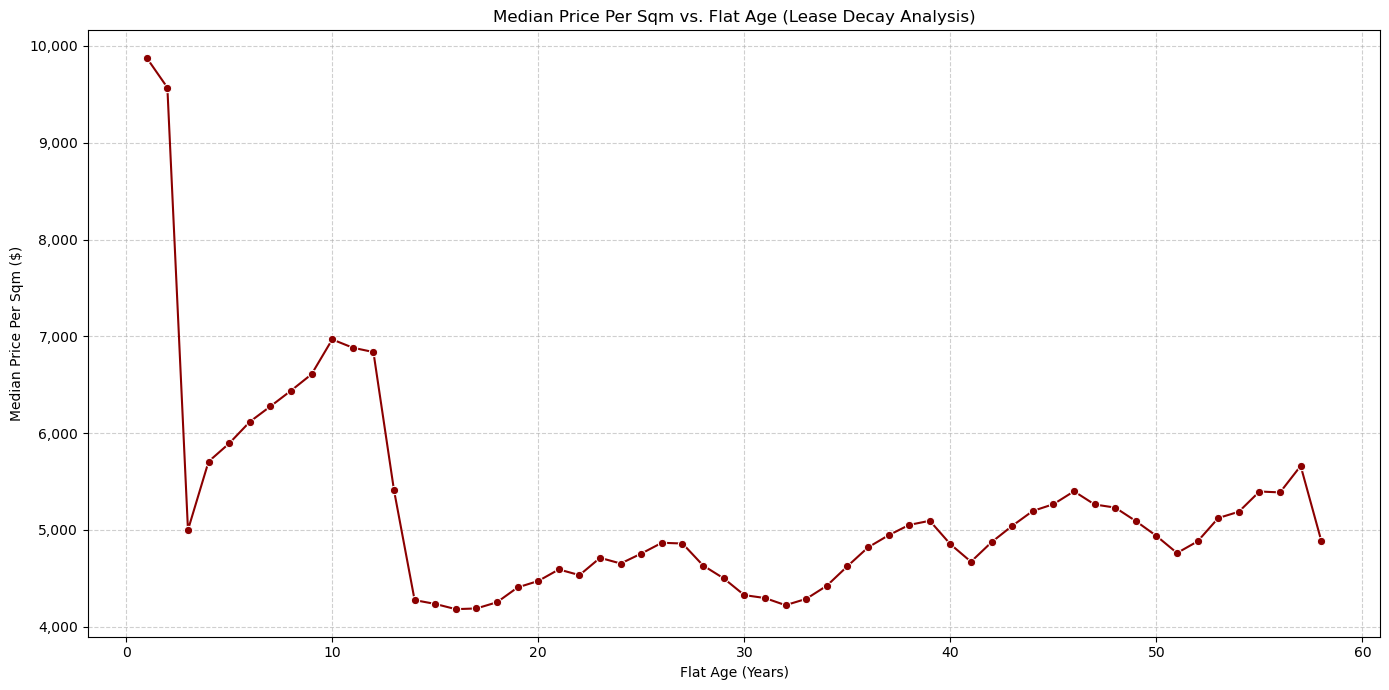

In [41]:
# Calculate median price_per_sqm for each remaining_lease_years
lease_decay_data = df_upd.groupby('flat_age')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='flat_age', y='price_per_sqm', data=lease_decay_data, marker='o', color='darkred')

plt.title('Median Price Per Sqm vs. Flat Age (Lease Decay Analysis)')
plt.xlabel('Flat Age (Years)')
plt.ylabel('Median Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Comments: Add in percentage / 10 year decrease in remaining lease years

Analysing the relationship between Locational/Temporal Factors and Resale Price

In [42]:
unique_towns = df_upd['town'].unique()
print("Unique Towns:")
for town in unique_towns:
    print(town)

Unique Towns:
ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


Price Per Sqm Distribution by Town
- Informs us on affordability per town

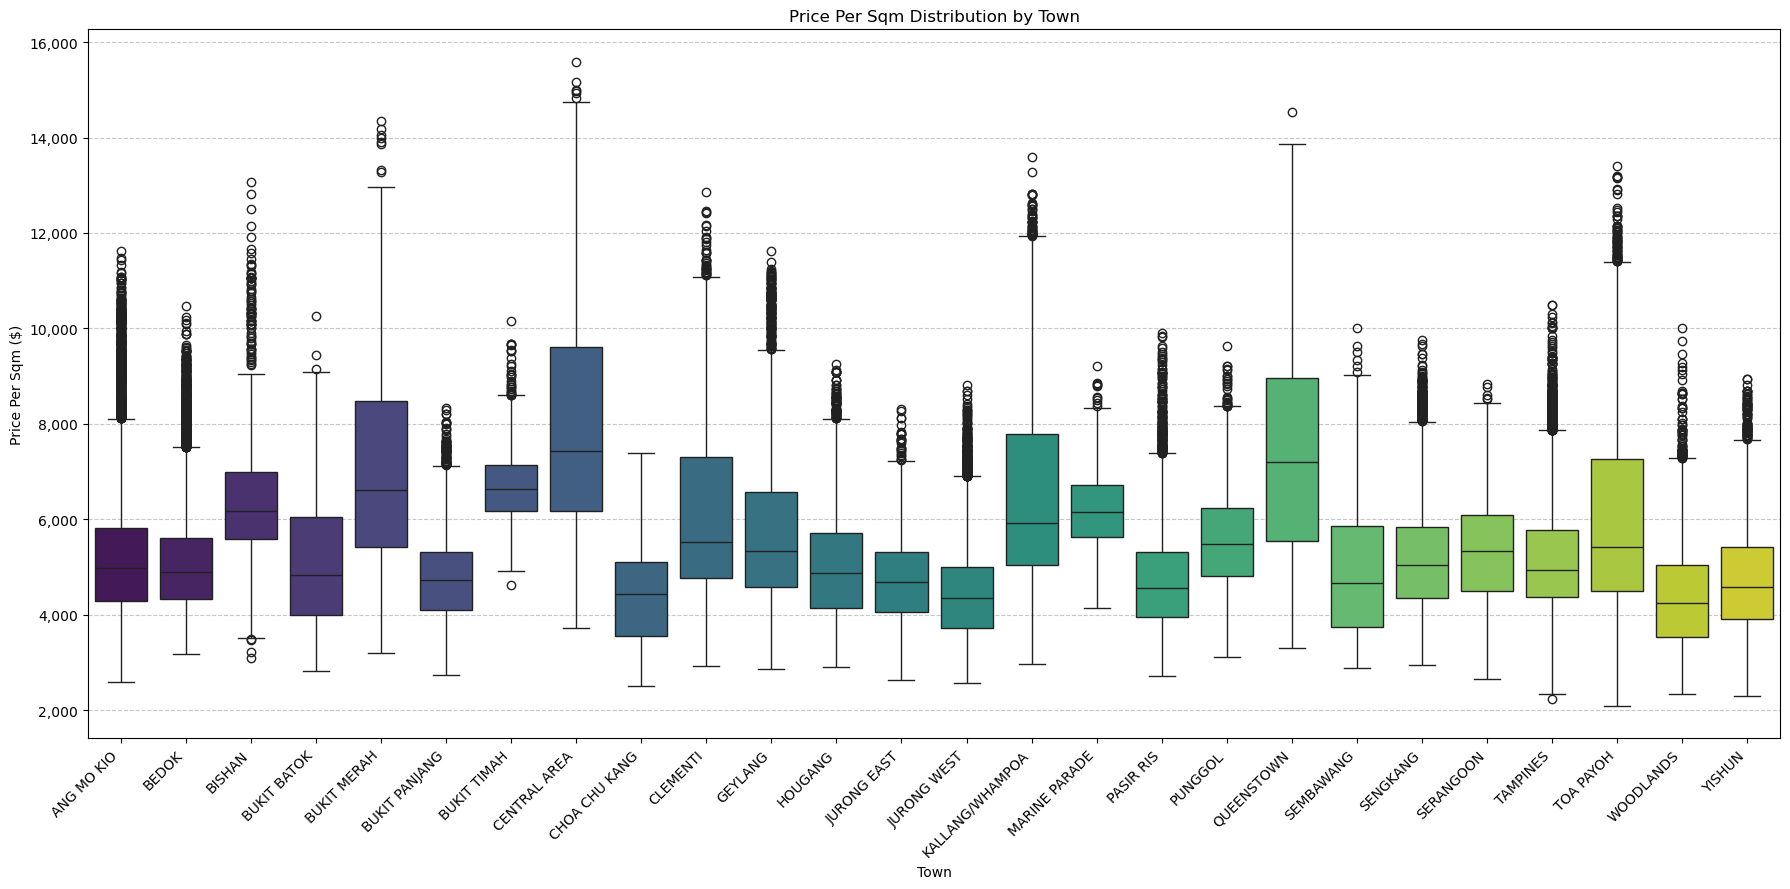

In [43]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='price_per_sqm', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Price Per Sqm Distribution by Town')
plt.xlabel('Town')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribution of Flat Age by Town
- Tells us the supply of older/younger flats in each town
- Informs us on Housing Stock

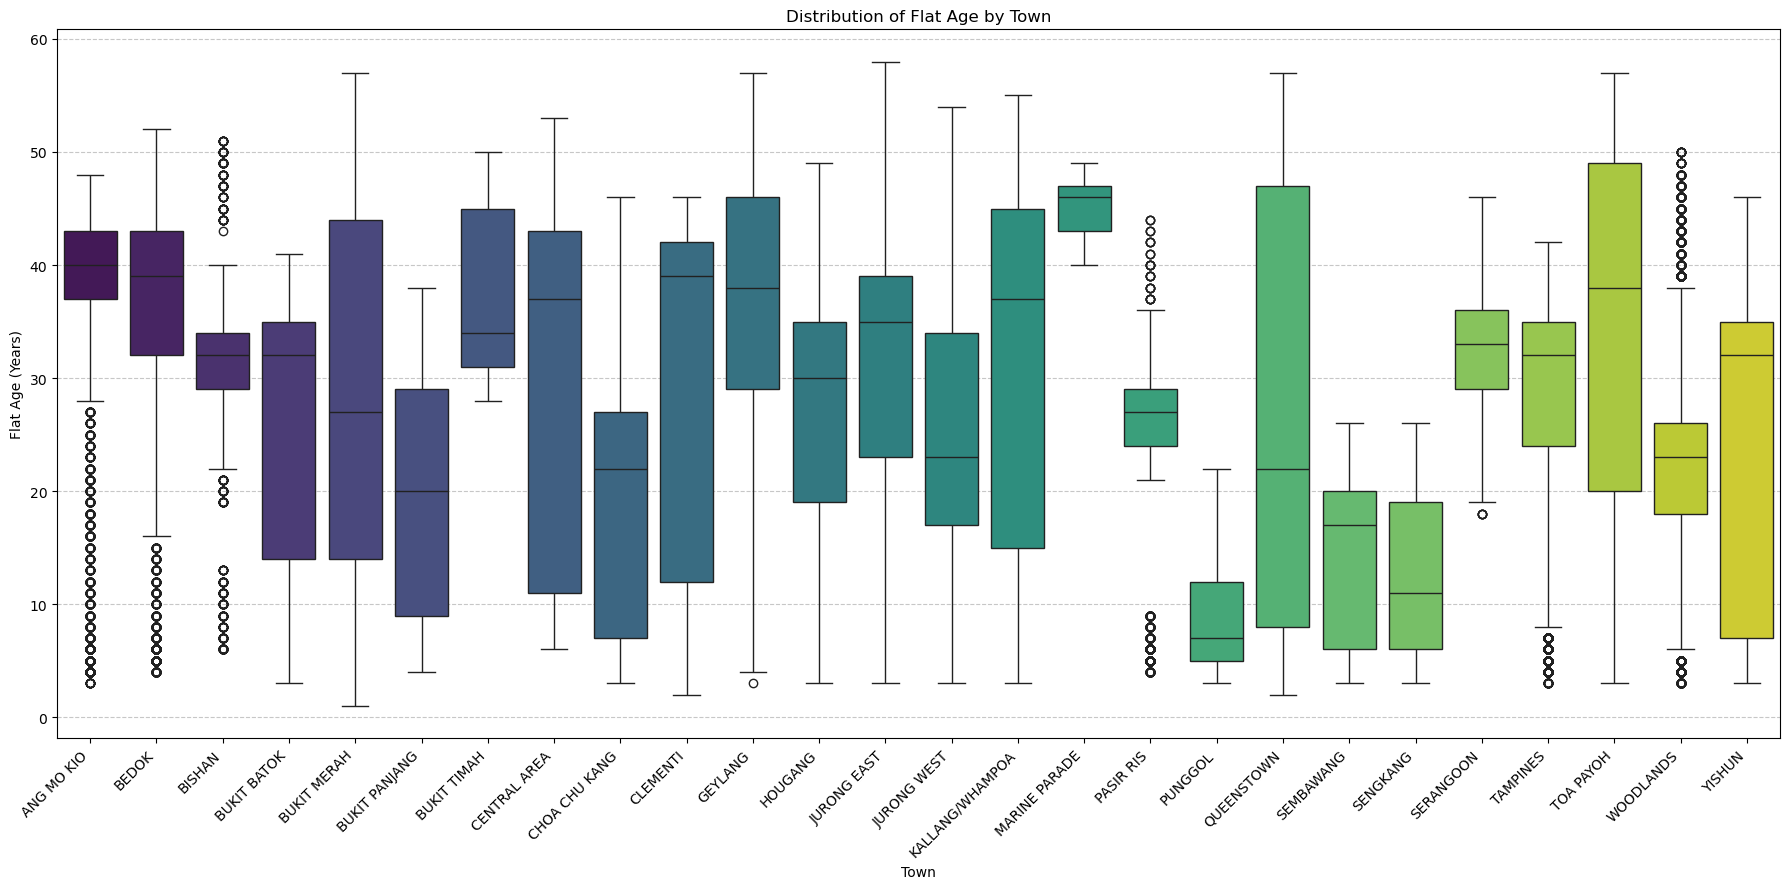

In [49]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='flat_age', data=df_upd, palette='viridis', hue='town', legend=False) # <--- Corrected this line
plt.title('Distribution of Flat Age by Town')
plt.xlabel('Town')
plt.ylabel('Flat Age (Years)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Heat Map of Town x Flat Type

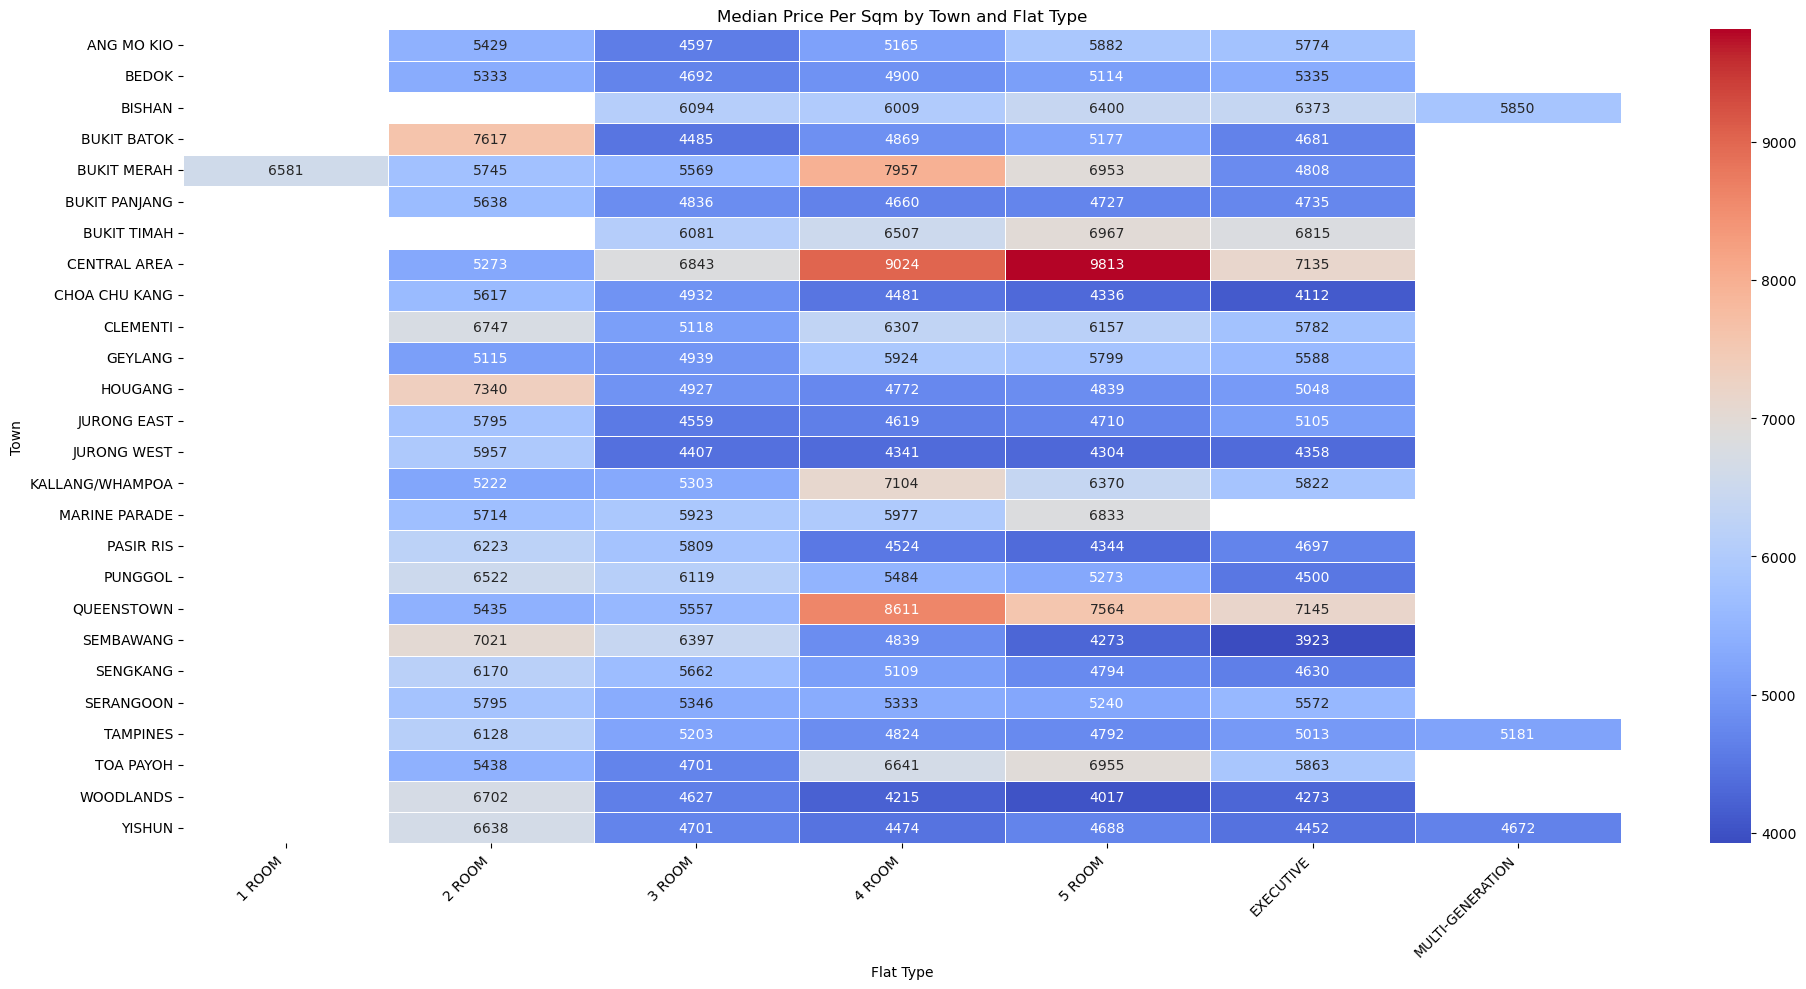

In [50]:
# Calculate median price_per_sqm for each town and flat_type
median_price_per_sqm_pivot = df_upd.groupby(['town', 'flat_type'])['price_per_sqm'].median().unstack()

plt.figure(figsize=(20, 10)) # Adjust figure size for readability
sns.heatmap(median_price_per_sqm_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Median Price Per Sqm by Town and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## STEP 4: PREPPING DATA FOR MODELLING
- Clean and Encode
- Add Essential Features
- Drop Unneccesary Features
- Check multicollinarity
- Check correlation
- Select Features for Modelling


## 4.1 Clean and Encode Data
- Categorical data into Numerical data - such as Town, Flat Type, Flat_Model , etc.

In [51]:
df_upd.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


Adding in Contextual Stats Encoding
- by Town and by Flat Type


In [52]:
# Town-level Stats
# Calculate town-level statistics directly using the 'town' column
town_stats = (
    df_upd.groupby('town')
          .agg(
              town_median_psqm = ('price_per_sqm', 'median'),
              town_mean_psqm   = ('price_per_sqm', 'mean'),
              town_avg_lease   = ('remaining_lease_years', 'mean'),
              town_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'town' column
df_upd = df_upd.merge(town_stats, on='town', how='left')

In [53]:
print("DataFrame after adding town-level statistics:")
display(df_upd.sample(5))

DataFrame after adding town-level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count
140725,2022-11-01,TAMPINES,5 ROOM,518B,TAMPINES CTRL 7,10 TO 12,108.0,DBSS,2008,880000.0,8148.148148,2022,14,85.0,4931.506849,5190.587612,70.777051,12994
43635,2019-02-01,ANG MO KIO,3 ROOM,631,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1985,270000.0,4029.850746,2019,34,64.0,4978.260870,5332.047492,63.132198,7988
14282,2017-09-01,KALLANG/WHAMPOA,4 ROOM,84,WHAMPOA DR,13 TO 15,91.0,Improved,1974,365000.0,4010.989011,2017,43,55.0,5932.203390,6499.371445,67.910732,5926
94904,2021-04-01,BISHAN,3 ROOM,22,SIN MING RD,10 TO 12,68.0,Improved,1973,265000.0,3897.058824,2021,48,51.0,6178.084180,6365.166690,67.908540,3466
181427,2024-06-01,CHOA CHU KANG,5 ROOM,790,CHOA CHU KANG NTH 6,13 TO 15,131.0,Model A,1996,745000.0,5687.022901,2024,28,71.0,4437.500000,4415.199783,78.637448,8887


In [54]:
# Flat_type-level Stats
# Calculate flat-type-level statistics directly using the 'flat_type' column
flat_type_stats = (
    df_upd.groupby('flat_type')
          .agg(
              flat_type_median_psqm = ('price_per_sqm', 'median'),
              flat_type_mean_psqm   = ('price_per_sqm', 'mean'),
              flat_type_avg_lease   = ('remaining_lease_years', 'mean'),
              flat_type_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'flat_type' column
df_upd = df_upd.merge(flat_type_stats, on='flat_type', how='left')

In [55]:
print("DataFrame after adding flat-type level statistics:")
display(df_upd.sample(15
                    ))

DataFrame after adding flat-type level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count
187586,2024-08-01,PUNGGOL,5 ROOM,260B,PUNGGOL WAY,13 TO 15,113.0,Improved,2016,800000.0,...,8,90.0,5489.843414,5546.687029,89.791701,14436,4900.00000,5139.315966,76.972926,48091
68816,2020-03-01,PASIR RIS,4 ROOM,524C,PASIR RIS ST 51,10 TO 12,93.0,Model A,2015,525000.0,...,5,94.0,4571.428571,4749.653807,73.626165,5687,5049.50495,5374.938855,77.739176,81967
78552,2020-09-01,CLEMENTI,3 ROOM,308,CLEMENTI AVE 4,01 TO 03,67.0,New Generation,1980,272888.0,...,40,58.0,5522.388060,6134.579664,67.612457,4335,5000.00000,5255.275896,64.795815,46071
70007,2020-04-01,SEMBAWANG,3 ROOM,590A,MONTREAL LINK,16 TO 18,68.0,Model A,2015,310000.0,...,5,94.0,4656.488550,4853.209882,84.380590,5389,5000.00000,5255.275896,64.795815,46071
28275,2018-06-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,82.0,New Generation,1978,345000.0,...,40,59.0,4978.260870,5332.047492,63.132198,7988,5000.00000,5255.275896,64.795815,46071
68799,2020-03-01,PASIR RIS,4 ROOM,478,PASIR RIS DR 4,10 TO 12,114.0,Model A,1992,426000.0,...,28,71.0,4571.428571,4749.653807,73.626165,5687,5049.50495,5374.938855,77.739176,81967
67248,2020-02-01,SENGKANG,4 ROOM,327C,ANCHORVALE RD,10 TO 12,92.0,Premium Apartment,2015,458888.0,...,5,94.0,5038.461538,5161.965552,86.194658,16023,5049.50495,5374.938855,77.739176,81967
21535,2018-01-01,YISHUN,4 ROOM,167,YISHUN RING RD,01 TO 03,84.0,Simplified,1987,285000.0,...,31,69.0,4592.233010,4706.291301,74.337259,13245,5049.50495,5374.938855,77.739176,81967
162501,2023-09-01,TOA PAYOH,3 ROOM,51,LOR 6 TOA PAYOH,01 TO 03,63.0,Standard,1983,328000.0,...,40,58.0,5416.666667,6014.104839,64.328937,6065,5000.00000,5255.275896,64.795815,46071
52057,2019-06-01,TAMPINES,4 ROOM,522B,TAMPINES CTRL 7,04 TO 06,93.0,Model A,2015,530000.0,...,4,95.0,4931.506849,5190.587612,70.777051,12994,5049.50495,5374.938855,77.739176,81967


Clean-up Numerical Values
- Storey Range (take average)

In [56]:
def convert_storey_range_to_avg(storey_range_str):
    if pd.isna(storey_range_str):
        return np.nan
    parts = storey_range_str.split(' TO ')
    if len(parts) == 2:
        try:
            lower = int(parts[0])
            upper = int(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where conversion to int fails
    return np.nan # Handle unexpected formats

# Apply the conversion function to create a new 'storey_avg' column
df_upd['storey_avg'] = df_upd['storey_range'].apply(convert_storey_range_to_avg)

# Display a sample of the updated DataFrame with the new 'storey_avg' column
print("DataFrame after converting 'storey_range' to 'storey_avg':")
display(df_upd[['storey_range', 'storey_avg']].sample(10))

DataFrame after converting 'storey_range' to 'storey_avg':


,storey_range,storey_avg
152422,01 TO 03,2.0
108932,10 TO 12,11.0
145875,07 TO 09,8.0
10105,10 TO 12,11.0
148183,34 TO 36,35.0
115846,04 TO 06,5.0
91850,10 TO 12,11.0
166124,04 TO 06,5.0
165969,10 TO 12,11.0
5336,13 TO 15,14.0


### Load All Numerical Columns

In [57]:
numerical_cols_upd = df_upd.select_dtypes(include=np.number).columns
print("Numerical Columns:")
for col in numerical_cols_upd:
    print(col)

Numerical Columns:
floor_area_sqm
lease_commence_date
resale_price
price_per_sqm
trans_year
flat_age
remaining_lease_years
town_median_psqm
town_mean_psqm
town_avg_lease
town_count
flat_type_median_psqm
flat_type_mean_psqm
flat_type_avg_lease
flat_type_count
storey_avg


Check for Missing Values (in Numerical Columns)

In [58]:
print("Missing values in numerical columns:")
print(df_upd[numerical_cols_upd].isnull().sum())

Missing values in numerical columns:
floor_area_sqm           0
lease_commence_date      0
resale_price             0
price_per_sqm            0
trans_year               0
flat_age                 0
remaining_lease_years    0
town_median_psqm         0
town_mean_psqm           0
town_avg_lease           0
town_count               0
flat_type_median_psqm    0
flat_type_mean_psqm      0
flat_type_avg_lease      0
flat_type_count          0
storey_avg               0
dtype: int64


### Round All Values to 4 d.p.

In [59]:
# Identify numerical columns
numerical_cols = df_upd.select_dtypes(include=np.number).columns

# Round all numerical columns to 4 decimal places
df_upd[numerical_cols] = df_upd[numerical_cols].round(4)

print("DataFrame after rounding all numerical values to 4 decimal places:")
display(df_upd.head())

DataFrame after rounding all numerical values to 4 decimal places:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count,storey_avg
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,...,61.0,4978.2609,5332.0475,63.1322,7988,6086.9565,6212.5195,79.9057,3586,11.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,...,60.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,5.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0


### Check for Correlation
- Highly correlated features break regression.

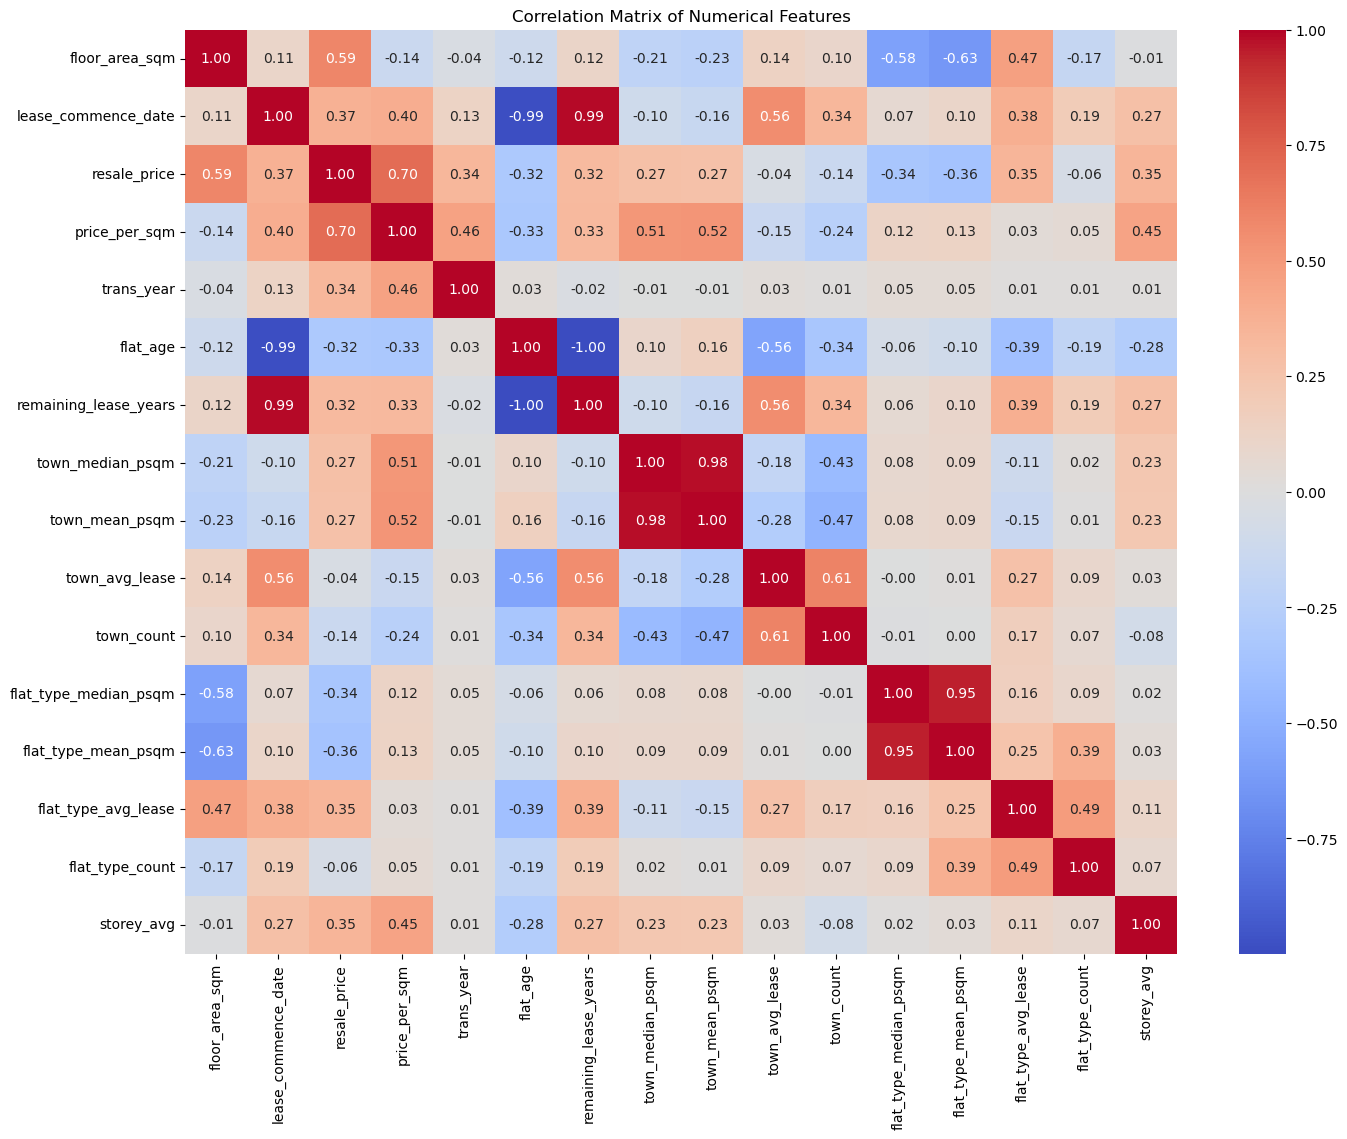

In [60]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_upd.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Findings:
- Consider dropping: lease_commence_date VS remaining_lease_years VS flat_age
- AND mean values (due to right-skewed data, mean values are not reliable)

### One Hot Encoding for Town and Flat_Type

In [61]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_town = encoder.fit_transform(df_upd[['town']])
encoded_town_df = pd.DataFrame(encoded_town, columns=encoder.get_feature_names_out(['town']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_town_df], axis=1)
df_upd = df_upd.drop('town', axis=1)

In [62]:
display(df_upd.sample(10))

,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
36378,2018-09-01,4 ROOM,140,TAMPINES ST 12,04 TO 06,93.0,New Generation,1984,415000.0,4462.3656,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42975,2019-01-01,5 ROOM,133,EDGEDALE PLAINS,01 TO 03,111.0,Premium Apartment,2003,385000.0,3468.4685,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31581,2018-07-01,3 ROOM,624C,PUNGGOL CTRL,16 TO 18,69.0,Model A,2014,350000.0,5072.4638,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33185,2018-08-01,5 ROOM,627,SENJA RD,13 TO 15,110.0,Premium Apartment,2004,465000.0,4227.2727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147652,2023-02-01,3 ROOM,703,YISHUN AVE 5,10 TO 12,68.0,New Generation,1984,356000.0,5235.2941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54249,2019-07-01,2 ROOM,780B,WOODLANDS CRES,10 TO 12,47.0,Model A,2015,227000.0,4829.7872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40145,2018-11-01,3 ROOM,326,SERANGOON AVE 3,04 TO 06,64.0,Simplified,1985,338000.0,5281.2500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
138661,2022-10-01,5 ROOM,518C,TAMPINES CTRL 7,13 TO 15,108.0,DBSS,2008,861000.0,7972.2222,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133512,2022-08-01,5 ROOM,226B,SUMANG LANE,10 TO 12,114.0,Premium Apartment,2018,720000.0,6315.7895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168753,2023-12-01,4 ROOM,498B,TAMPINES ST 45,04 TO 06,106.0,Premium Apartment,1997,610000.0,5754.7170,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Flat_Type

In [63]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_flat_type = encoder.fit_transform(df_upd[['flat_type']])
encoded_flat_type_df = pd.DataFrame(encoded_flat_type, columns=encoder.get_feature_names_out(['flat_type']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_flat_type_df], axis=1)
df_upd = df_upd.drop('flat_type', axis=1)


In [64]:
print("DataFrame after one-hot encoding 'flat_type' column:")
display(df_upd.sample(14))

DataFrame after one-hot encoding 'flat_type' column:


,month,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,...,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
109440,2021-10-01,252,BISHAN ST 22,13 TO 15,101.0,Model A,1992,680000.0,6732.6733,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
160402,2023-08-01,497C,TAMPINES ST 45,04 TO 06,131.0,Premium Apartment,1996,715000.0,5458.0153,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175521,2024-03-01,287,TAMPINES ST 22,01 TO 03,102.0,Model A,1984,520000.0,5098.0392,2024,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
166562,2023-11-01,204C,COMPASSVALE DR,10 TO 12,110.0,Improved,2001,645000.0,5863.6364,2023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88248,2021-01-01,487A,CHOA CHU KANG AVE 5,04 TO 06,93.0,Model A,2016,438000.0,4709.6774,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
168880,2023-12-01,185C,WOODLANDS ST 13,10 TO 12,68.0,Model A,2019,442000.0,6500.0000,2023,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48186,2019-04-01,79E,TOA PAYOH CTRL,10 TO 12,76.0,Model A,2009,630000.0,8289.4737,2019,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79414,2020-09-01,90,DAWSON RD,28 TO 30,83.0,Premium Apartment,2016,868000.0,10457.8313,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100393,2021-06-01,670B,EDGEFIELD PLAINS,04 TO 06,113.0,Premium Apartment,2016,650000.0,5752.2124,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
179727,2024-05-01,327B,SUMANG WALK,13 TO 15,68.0,Model A,2018,508888.0,7483.6471,2024,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# WORKING IN PROGRESS : POSTAL CODE / LOCATIONAL DATA FROM APIs

## Step 5: Cleaning Data to calculate distance from unit to mrt

In [65]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

#### 5.1 standardizing block and street name

In [66]:
def standardize_address_column(series):
    """Applies common cleaning and standardization to a string series."""
    # 1. Convert to string and handle NaN
    series = series.astype(str).fillna('')
    # 2. Convert to uppercase
    series = series.str.upper()
    # 3. Remove leading/trailing spaces
    series = series.str.strip()
    # 4. Collapse internal multiple spaces to a single space
    series = series.str.replace(r'\s+', ' ', regex=True)
    return series

# Apply the function to the block and street_name columns
df['block'] = standardize_address_column(df['block'])
df['street_name'] = standardize_address_column(df['street_name'])

print("Address columns have been standardized.")
df.head()

Address columns have been standardized.


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### 5.2 Create new unique address column combining street name and block

In [67]:
# Create the full address by concatenating the block and street name
df['full_address'] = (df['block'] + ' ' + df['street_name']).str.strip()

# Filter out rows where the address is empty (e.g., if both block/street were 'NAN')
df = df[df['full_address'].astype(bool)].copy()

# Extract the list of unique addresses for efficient API calls
unique_addresses_list = df['full_address'].unique().tolist()

print(f"✅ Created 'full_address' column.")
print(f"   Total unique addresses for API to call: {len(unique_addresses_list)}")
df[['block', 'street_name', 'full_address']].head()

✅ Created 'full_address' column.
   Total unique addresses for API to call: 9598


,block,street_name,full_address
0,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10
1,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4
2,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5
3,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10
4,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5


In [68]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


#### 5.3 Geocoding Merge (2 addresses not found)

In [69]:
import pandas as pd

In [70]:
import requests
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
geocoded_results = {}
total_requests = len(unique_addresses_list)

print("\n--- Starting Rate-Limited Geocoding ---")

for i, address in enumerate(unique_addresses_list):
    params = {
        'searchVal': address,
        'returnGeom': 'Y',        # Request coordinates
        'getAddrDetails': 'Y'     # Request postal code
    }

    try:
        response = requests.get(ONEMAP_API_URL, params=params, timeout=15)
        response.raise_for_status()
        data = response.json()

        if data.get('found', 0) > 0 and data['results']:
            result = data['results'][0]
            geocoded_results[address] = {
                'latitude': float(result.get('LATITUDE')),
                'longitude': float(result.get('LONGITUDE')),
                'postal_code': result.get('POSTAL'),
            }
        else:
            geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    except requests.exceptions.RequestException as e:
        # Log errors but continue processing
        print(f"Error for {address} (Request failed): {e}")
        geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    # Rate Limiting: Pause for 1 second every 100 requests
    if (i + 1) % 100 == 0:
        time.sleep(1)
        print(f"    Processed {i+1}/{total_requests} addresses. Pausing 1 second...")

print("\n--- Geocoding Complete. Merging Results ---")

# Merge the new data back into the original DataFrame
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})
df = pd.merge(df, results_df, on='full_address', how='left')


--- Starting Rate-Limited Geocoding ---
    Processed 100/9598 addresses. Pausing 1 second...
Error for 30 JLN KLINIK (Request failed): HTTPSConnectionPool(host='www.onemap.gov.sg', port=443): Read timed out. (read timeout=15)
    Processed 200/9598 addresses. Pausing 1 second...
    Processed 300/9598 addresses. Pausing 1 second...
    Processed 400/9598 addresses. Pausing 1 second...
    Processed 500/9598 addresses. Pausing 1 second...
    Processed 600/9598 addresses. Pausing 1 second...
    Processed 700/9598 addresses. Pausing 1 second...
    Processed 800/9598 addresses. Pausing 1 second...
    Processed 900/9598 addresses. Pausing 1 second...
    Processed 1000/9598 addresses. Pausing 1 second...
    Processed 1100/9598 addresses. Pausing 1 second...
    Processed 1200/9598 addresses. Pausing 1 second...
    Processed 1300/9598 addresses. Pausing 1 second...
    Processed 1400/9598 addresses. Pausing 1 second...
    Processed 1500/9598 addresses. Pausing 1 second...
    Proces

In [71]:
import requests # Need to ensure this is available for Step 2

# Assuming 'geocoded_results' dictionary still exists from the previous run

print("\n--- 1. Identifying Failed Addresses for Retry ---")

# 1. Initialize a list to hold the addresses that need to be re-queried
addresses_to_retry = []

# 2. Iterate through the results to find addresses with NaN coordinates
for address, data in geocoded_results.items():
    # pd.isna() checks safely for np.nan values
    if pd.isna(data['latitude']):
        addresses_to_retry.append(address)

print(f"Found {len(addresses_to_retry)} addresses that failed or were not found.")

# Set the increased timeout (20 seconds)
RETRY_TIMEOUT = 20
print(f"Set retry timeout to {RETRY_TIMEOUT} seconds.")


--- 1. Identifying Failed Addresses for Retry ---
Found 3 addresses that failed or were not found.
Set retry timeout to 20 seconds.


In [72]:
# --- Retry failed addresses with higher timeout and retries ---
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
RETRY_TIMEOUT = 20  # per request
MAX_RETRIES = 3
BACKOFF_BASE = 2

if not addresses_to_retry:
    print("No addresses to retry.")
else:
    print(f"Retrying {len(addresses_to_retry)} addresses with timeout={RETRY_TIMEOUT}s ...")

    for addr in addresses_to_retry:
        params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
        success = False
        for attempt in range(1, MAX_RETRIES + 1):
            try:
                resp = requests.get(ONEMAP_API_URL, params=params, timeout=RETRY_TIMEOUT)
                resp.raise_for_status()
                data = resp.json()
                if data.get("found", 0) > 0 and data["results"]:
                    res = data["results"][0]
                    geocoded_results[addr] = {
                        "latitude": float(res.get("LATITUDE")),
                        "longitude": float(res.get("LONGITUDE")),
                        "postal_code": res.get("POSTAL"),
                    }
                else:
                    geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}
                success = True
                break
            except requests.exceptions.Timeout as e:
                if attempt < MAX_RETRIES:
                    wait = BACKOFF_BASE ** (attempt - 1)
                    print(f"Timeout for {addr}; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                    time.sleep(wait)
                else:
                    print(f"Timeout for {addr} after {MAX_RETRIES} tries: {e}")
            except requests.exceptions.RequestException as e:
                print(f"Error for {addr} on retry: {e}")
                break
        if not success:
            geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}

    # Refresh merged results in df
    results_df = (
        pd.DataFrame.from_dict(geocoded_results, orient="index")
        .reset_index()
        .rename(columns={"index": "full_address"})
    )
    df = pd.merge(df.drop(columns=["latitude", "longitude", "postal_code"], errors="ignore"),
                  results_df, on="full_address", how="left")

    print("Retry complete; df updated with retried coordinates/postal codes.")


Retrying 3 addresses with timeout=20s ...
Retry complete; df updated with retried coordinates/postal codes.


Test for Successful Geo-coding after Re-trial


In [73]:
# --- Validate geocoding completeness ---
# Count NaNs in coordinates
nan_lat = df["latitude"].isna().sum()
nan_lon = df["longitude"].isna().sum()
total = len(df)

print(f"Total flats: {total}")
print(f"Rows missing latitude: {nan_lat}")
print(f"Rows missing longitude: {nan_lon}")

# List any addresses still missing coords
missing_coords = df[df["latitude"].isna() | df["longitude"].isna()][["full_address", "postal_code"]]
if missing_coords.empty:
    print("✅ All addresses have coordinates.")
else:
    print("⚠️ Addresses still missing coordinates:")
    display(missing_coords.head(20))  # adjust/omit display if not in notebook


Total flats: 194170
Rows missing latitude: 0
Rows missing longitude: 0
✅ All addresses have coordinates.


#### 5.5 Merging of geo_coded results into main df

In [74]:
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})

# 1. Drop old (potentially partial/stale) coordinate columns if they exist
# This ensures a clean merge. 'errors=ignore' prevents the code from failing if they don't exist.
df = df.drop(columns=['latitude', 'longitude', 'postal_code'], errors='ignore')

# 2. Merge the final results back using the 'full_address' key
df = pd.merge(df, results_df, on='full_address', how='left')

print("✅ Final Geocoding results merged successfully.")
df[['full_address', 'postal_code', 'latitude', 'longitude']].sample(10)

✅ Final Geocoding results merged successfully.


,full_address,postal_code,latitude,longitude
115703,308A PUNGGOL WALK,821308,1.407761,103.900999
92493,405 SIN MING AVE,570405,1.362853,103.834740
192612,85C LOR 4 TOA PAYOH,313085,1.336286,103.847479
134887,47 TELOK BLANGAH DR,100047,1.272044,103.810097
95117,13 CANTONMENT CL,080013,1.274699,103.840485
71313,309 CLEMENTI AVE 4,120309,1.320920,103.766378
188064,890A TAMPINES AVE 1,521890,1.346724,103.933876
89760,120 LOR 2 TOA PAYOH,310120,1.339136,103.845563
44976,605 ANG MO KIO AVE 5,560605,1.379672,103.836487
115564,601A PUNGGOL CTRL,821601,1.402468,103.907582


In [75]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,1.362005,103.853880,560406
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,1.370966,103.838202,560108
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,1.380709,103.835368,560602
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,1.366201,103.857201,560465
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,1.381041,103.835132,560601


#### 5.6 Install kaggle hub and mrt coordinate dataset

In [76]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


In [77]:
import os
import kagglehub

# --- Step 1: Download ---
# Download latest version (assuming this returns the directory path)
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Path to dataset files:", path)
# Example path output: /home/user/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/datav1

# Assuming the CSV is directly inside the downloaded folder.
# You may need to inspect the directory contents to find the exact file name.
file_name = "singapore-train-station-coordinates.csv" # Common convention
csv_path = os.path.join(path, file_name)

print(f"Attempting to load: {csv_path}")

Path to dataset files: /Users/hz/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1
Attempting to load: /Users/hz/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/singapore-train-station-coordinates.csv


In [78]:
import pandas as pd

import kagglehub
from pathlib import Path
import glob # Used to find files within subdirectories

# --- 1. Download the Dataset from Kaggle Hub ---
print("--- 1. Downloading MRT and LRT Coordinates from Kaggle ---")

# This downloads the dataset and returns the local directory path (e.g., .../singapore-train-station-coordinates)
path_str = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")
root_path = Path(path_str)

# NEW: Use glob to search recursively for the CSV file, regardless of the 'versions/1/' folder structure.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    raise FileNotFoundError(f"Could not find any CSV files in the downloaded folder or its subdirectories: {root_path}")

# Select the first found CSV file (should be the only one)
csv_path = csv_files[0]

print(f"✅ Download complete. Correct CSV path found at: {csv_path}")

# --- 2. Load the CSV into a DataFrame ---
print("--- 2. Loading MRT Coordinates CSV into DataFrame ---")
mrt_df = pd.read_csv(csv_path)
print("\n✅ CSV loaded successfully. Here are the first few rows:")
display(mrt_df.sample(10))
print(f"Number of Stations Identified: {len(mrt_df)}")




--- 1. Downloading MRT and LRT Coordinates from Kaggle ---
✅ Download complete. Correct CSV path found at: /Users/hz/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/mrt_lrt_data.csv
--- 2. Loading MRT Coordinates CSV into DataFrame ---

✅ CSV loaded successfully. Here are the first few rows:


,station_name,type,lat,lng
79,MacPherson,MRT,1.326769,103.889901
138,Thanggam,LRT,1.397378,103.875610
149,Damai,LRT,1.405293,103.908606
50,Kembangan,MRT,1.320998,103.913433
17,Novena,MRT,1.320089,103.843405
94,Bayfront,MRT,1.281371,103.858998
153,Samudera,LRT,1.415955,103.902185
91,Pasir Panjang,MRT,1.276111,103.791893
155,Sumang,LRT,1.408501,103.898605
136,Farmway,LRT,1.397178,103.889168


Number of Stations Identified: 157


In [79]:
mrt_df.columns

Index(['station_name', 'type', 'lat', 'lng'], dtype='object')

In [80]:
mrt_df = mrt_df.rename(columns={'lat': 'mrt_lat', 'lng': 'mrt_lng'})

In [81]:
mrt_df.sample(5)

,station_name,type,mrt_lat,mrt_lng
84,Caldecott,MRT,1.337649,103.839627
101,Tan Kah Kee,MRT,1.325826,103.807959
110,Geylang Bahru,MRT,1.321479,103.871457
109,Bendemeer,MRT,1.313674,103.863098
128,Pending,LRT,1.376223,103.771277


# 5.7 TESTING

In [82]:
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code
190467,2024-09,TOA PAYOH,3 ROOM,66,LOR 4 TOA PAYOH,07 TO 09,64.0,Standard,1969,43 years 05 months,375000.0,66 LOR 4 TOA PAYOH,1.335013,103.851778,310066
133309,2022-08,KALLANG/WHAMPOA,4 ROOM,113B,MCNAIR RD,28 TO 30,93.0,Premium Apartment,2017,94 years 05 months,952000.0,113B MCNAIR RD,1.321181,103.860568,323113
53385,2019-07,JURONG WEST,5 ROOM,822,JURONG WEST ST 81,07 TO 09,128.0,Improved,1993,73 years 05 months,365000.0,822 JURONG WEST ST 81,1.347079,103.693822,640822
130023,2022-07,BEDOK,4 ROOM,807C,CHAI CHEE RD,04 TO 06,93.0,Model A,2016,93 years 04 months,670000.0,807C CHAI CHEE RD,1.327998,103.923249,463807
131058,2022-07,PUNGGOL,3 ROOM,663A,PUNGGOL DR,16 TO 18,65.0,Model A,2016,93 years,395000.0,663A PUNGGOL DR,1.400243,103.917080,821663
156033,2023-06,TOA PAYOH,3 ROOM,106,POTONG PASIR AVE 1,04 TO 06,74.0,Model A,1984,60 years 02 months,550000.0,106 POTONG PASIR AVE 1,1.334100,103.868171,350106
177858,2024-04,TAMPINES,5 ROOM,450C,TAMPINES ST 42,07 TO 09,123.0,Improved,1996,71 years 06 months,780000.0,450C TAMPINES ST 42,1.357135,103.952252,523450
86025,2020-12,HOUGANG,5 ROOM,238,HOUGANG AVE 1,10 TO 12,138.0,Model A-Maisonette,1984,62 years 08 months,705000.0,238 HOUGANG AVE 1,1.357144,103.888970,530238
132314,2022-08,BEDOK,3 ROOM,32,CHAI CHEE AVE,04 TO 06,73.0,Improved,1974,50 years 06 months,348000.0,32 CHAI CHEE AVE,1.323717,103.925001,461032
2591,2017-03,BUKIT MERAH,3 ROOM,46,JLN BT HO SWEE,10 TO 12,62.0,Standard,1970,51 years 10 months,370000.0,46 JLN BT HO SWEE,1.288296,103.826145,160046


In [83]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances  # pip install scikit-learn if needed

R = 6371  # km

# Assume df_housing has columns ['lat', 'lon'] and df_mrt has ['mrt_lat', 'mrt_lon', 'station_name']
# Drop rows with missing coords
housing = df.dropna(subset=['latitude', 'longitude']).copy()
mrt = mrt_df.dropna(subset=['mrt_lat', 'mrt_lng']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
mrt_rad = np.radians(mrt[['mrt_lat', 'mrt_lng']].values)

# Distance matrix (housing x MRT)
dist_km = R * haversine_distances(housing_rad, mrt_rad)

# Nearest MRT index and distance per housing row
nearest_idx = dist_km.argmin(axis=1)
nearest_dist = dist_km[np.arange(len(housing)), nearest_idx]

# Attach results
housing['nearest_mrt_idx'] = nearest_idx
housing['distance_to_nearest_mrt_km'] = nearest_dist

# Pull MRT columns to merge
mrt_reset = mrt.reset_index(drop=True)
housing['nearest_mrt_name'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'station_name'].values
housing['nearest_mrt_lat'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lat'].values
housing['nearest_mrt_lng'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lng'].values

# Merge back into df_housing on index
df_housing = df.merge(
    housing[['distance_to_nearest_mrt_km', 'nearest_mrt_name', 'nearest_mrt_lat', 'nearest_mrt_lng']],
    left_index=True, right_index=True, how='left'
)

print("Done. Mean distance:", housing['distance_to_nearest_mrt_km'].mean())
print(df_housing[['latitude', 'longitude', 'nearest_mrt_name', 'distance_to_nearest_mrt_km']].head())


Done. Mean distance: 0.6651905980590271
   latitude   longitude nearest_mrt_name  distance_to_nearest_mrt_km
0  1.362005  103.853880       Ang Mo Kio                    1.011433
1  1.370966  103.838202       Ang Mo Kio                    1.270031
2  1.380709  103.835368     Yio Chu Kang                    1.068607
3  1.366201  103.857201       Ang Mo Kio                    0.947097
4  1.381041  103.835132     Yio Chu Kang                    1.091392


In [85]:
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng
12037,2017-08,CHOA CHU KANG,EXECUTIVE,461,CHOA CHU KANG AVE 4,04 TO 06,142.0,Premium Apartment,2000,81 years 08 months,460000.0,461 CHOA CHU KANG AVE 4,1.378178,103.734550,680461,1.216478,South View,1.380299,103.745286
182667,2024-06,TOA PAYOH,4 ROOM,264,TOA PAYOH EAST,13 TO 15,93.0,Model A,2019,94 years 07 months,960000.0,264 TOA PAYOH EAST,1.332465,103.855238,310264,0.867279,Toa Payoh,1.332405,103.847436
186751,2024-08,CLEMENTI,3 ROOM,365,CLEMENTI AVE 2,07 TO 09,67.0,New Generation,1978,52 years 06 months,385000.0,365 CLEMENTI AVE 2,1.312300,103.769944,120365,0.589088,Clementi,1.314925,103.765341
141795,2022-12,GEYLANG,3 ROOM,99,ALJUNIED CRES,07 TO 09,67.0,New Generation,1978,54 years 02 months,385000.0,99 ALJUNIED CRES,1.321381,103.884306,380099,0.572022,Aljunied,1.316474,103.882762
170070,2024-01,HOUGANG,4 ROOM,475A,UPP SERANGOON CRES,10 TO 12,92.0,DBSS,2014,89 years 10 months,755000.0,475A UPP SERANGOON CRES,1.376298,103.900221,531475,0.878457,Kangkar,1.383957,103.902160


In [86]:
from pathlib import Path
import numpy as np
import pandas as pd

# 1) Download/load mall coordinates (requires Kaggle credentials; or point malls_csv to your own file)
try:
    import kagglehub  # pip install kagglehub if missing

    malls_root = Path(kagglehub.dataset_download("sunnysharma432/singapore-malls-pois"))
    csv_candidates = list(malls_root.glob("**/*.csv"))
    if not csv_candidates:
        raise FileNotFoundError(f"No CSV files found under {malls_root}")
    malls_csv = csv_candidates[0]
    df_mall = pd.read_csv(malls_csv)

    # Normalize column names for detection
    norm_map = {col: ''.join(ch for ch in col.lower() if ch.isalnum()) for col in df_mall.columns}

    lat_candidates = {'malllat', 'lat', 'latitude', 'y', 'latitudedegrees'}
    lon_candidates = {'malllon', 'lon', 'lng', 'longitude', 'x', 'longitudedegrees'}

    lat_col = next((orig for orig, norm in norm_map.items() if norm in lat_candidates), None)
    lon_col = next((orig for orig, norm in norm_map.items() if norm in lon_candidates), None)

    if not lat_col or not lon_col:
        raise KeyError(f"Could not find latitude/longitude columns. Columns present: {df_mall.columns.tolist()}")

    df_mall = df_mall.rename(columns={lat_col: 'mall_lat', lon_col: 'mall_lon'})
    df_mall = df_mall.dropna(subset=['mall_lat', 'mall_lon'])
    print(f"✅ Malls loaded: {len(df_mall)} rows from {malls_csv}")
    print(f"Using lat column '{lat_col}' and lon column '{lon_col}'.")
except Exception as e:
    print(f"❌ Unable to load malls dataset: {e}")
    df_mall = pd.DataFrame(columns=['mall_lat', 'mall_lon'])

# 2) Vectorised Haversine matrix helper
def _haversine_matrix(unit_coords: np.ndarray, target_coords: np.ndarray) -> np.ndarray:
    unit_lat = np.radians(unit_coords[:, 0])
    unit_lon = np.radians(unit_coords[:, 1])
    target_lat = np.radians(target_coords[:, 0])
    target_lon = np.radians(target_coords[:, 1])

    dlat = unit_lat[:, None] - target_lat[None, :]
    dlon = unit_lon[:, None] - target_lon[None, :]
    a = np.sin(dlat / 2.0) ** 2 + np.cos(unit_lat)[:, None] * np.cos(target_lat)[None, :] * np.sin(dlon / 2.0) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

# 3) Add distance-to-nearest-mall
def add_distance_to_nearest_mall(df: pd.DataFrame, df_mall: pd.DataFrame) -> pd.DataFrame:
    """
    Adds a `distance_to_nearest_mall_km` column to `df` using Haversine distance
    to the nearest mall. Requires `df` to already have `latitude` and `longitude`.
    """
    units = df.dropna(subset=['latitude', 'longitude']).copy()
    mall_coords = df_mall[['mall_lat', 'mall_lon']].dropna()

    if units.empty or mall_coords.empty:
        out = df.copy()
        out['distance_to_nearest_mall_km'] = np.nan
        return out

    distance_matrix_km = _haversine_matrix(
        units[['latitude', 'longitude']].to_numpy(),
        mall_coords.to_numpy()
    )
    units.loc[:, 'distance_to_nearest_mall_km'] = distance_matrix_km.min(axis=1)

    out = df.merge(
        units[['distance_to_nearest_mall_km']],
        left_index=True,
        right_index=True,
        how='left'
    )
    print("✅ distance_to_nearest_mall_km calculated and merged.")
    return out

# Example usage:
# df = add_distance_to_nearest_mall(df, df_mall)
# df[['full_address', 'distance_to_nearest_mall_km']].head()


100%|████████████████████████████████████████| 6.48k/6.48k [00:00<00:00, 3.26MB/s]

Extracting files...
✅ Malls loaded: 249 rows from /Users/hz/.cache/kagglehub/datasets/sunnysharma432/singapore-malls-pois/versions/1/singapore_malls_pois.csv
Using lat column 'lat' and lon column 'lon'.


# 5.8 NEXT STEPS: SCHOOLS?

In [87]:
import pandas as pd

In [90]:
schools_df = pd.read_csv('moe_os_schooldata.csv')

In [91]:
schools_df.sample(5)

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,nature_code,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code
117,GREENRIDGE SECONDARY SCHOOL,http://www.greenridgesec.moe.edu.sg,31 Gangsa Road,678972,67691491,na,na,na,GRSS@MOE.EDU.SG,"Bukit Panjang MRT, Bukit Panjang LRT, Petir LRT",...,CO-ED SCHOOL,SINGLE SESSION,SECONDARY (S1-S5),No,No,No,No,CHINESE,MALAY,TAMIL
209,PEI HWA PRESBYTERIAN PRIMARY SCHOOL,http://www.peihwapresbyterianpri.moe.edu.sg/,7 PEI WAH AVENUE,597610,64663787,64663797,64621944,na,PHPPS@MOE.EDU.SG,Beauty World,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,Yes,No,No,No,CHINESE,na,na
286,TAO NAN SCHOOL,http://www.taonan.moe.edu.sg,49 MARINE CRESCENT,449761,64428307,na,64435973,na,TAONAN_SCH@MOE.EDU.SG,"Marine Parade, Marine Terrace",...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,Yes,No,Yes,No,CHINESE,na,na
173,NAN CHIAU PRIMARY SCHOOL,http://www.ncps.moe.edu.sg,50 ANCHORVALE LINK,545080,64897905,na,64897906,na,NCPS@MOE.EDU.SG,Sengkang Station,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
254,SINGAPORE CHINESE GIRLS' PRIMARY SCHOOL,www.scgs.moe.edu.sg,190 DUNEARN ROAD,309437,62527966,na,62523076,na,SCGPS@MOE.EDU.SG,Stevens,...,GIRLS' SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL


In [92]:
schools_df.columns

Index(['school_name', 'url_address', 'address', 'postal_code', 'telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address', 'mrt_desc',
       'bus_desc', 'principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name',
       'dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'],
      dtype='object')

In [93]:
schools_df.drop(columns=['url_address','telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address','principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name','dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'], inplace=True)

In [94]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  337 non-null    object
 1   address      337 non-null    object
 2   postal_code  337 non-null    int64 
 3   mrt_desc     337 non-null    object
 4   bus_desc     337 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [95]:
schools_df.sample(5)

,school_name,address,postal_code,mrt_desc,bus_desc
300,WEST SPRING SECONDARY SCHOOL,61 SENJA ROAD,677737,"BUKIT PANJANG MRT, JELAPANG LRT, SENJA LRT","920, 972, 976"
29,BENDEMEER SECONDARY SCHOOL,1 ST WILFRED ROAD,327919,BOON KENG MRT,"13, 23, 31, 64, 65, 66, 125, 133, 140, 14..."
66,CHONGZHENG PRIMARY SCHOOL,1 TAMPINES STREET 21,529392,Tampines MRT Station; Tampines East MRT Station,"3,3A, 8, 17, 18, 20, 28, 34, 39, 59, 518"
55,CHIJ (KELLOCK),1 Bukit Teresa Road,99757,Outram Park Station,"61, 124, 143, 166"
130,HUA YI SECONDARY SCHOOL,60 JURONG WEST ST 42,649371,"LAKESIDE MRT, CHINESE GARDEN MRT","49, 98, 98B, 98M, 99, 157, 185, 187, 198, 198A..."


In [96]:
# --- Schools proximity + nearest (index-accurate merge) ---
import requests, time, numpy as np, pandas as pd

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
REQUEST_TIMEOUT = 20
MAX_RETRIES = 3
BACKOFF_BASE = 2

# 1) Geocode schools from MOE CSV (skip if you already have `schools` with lat/lon)
schools_raw = pd.read_csv("moe_os_schooldata.csv")
schools_raw["school_address"] = (
    schools_raw["address"].fillna("") + " Singapore " + schools_raw["postal_code"].astype(str).str.zfill(6)
)
unique_schools = schools_raw[["school_name", "school_address"]].drop_duplicates()

school_coords = {}
for _, row in unique_schools.iterrows():
    addr = row["school_address"]
    params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
    success = False
    for attempt in range(1, MAX_RETRIES + 1):
        try:
            resp = requests.get(ONEMAP_API_URL, params=params, timeout=REQUEST_TIMEOUT)
            resp.raise_for_status()
            data = resp.json()
            if data.get("found", 0) > 0 and data["results"]:
                res = data["results"][0]
                school_coords[addr] = {"latitude": float(res.get("LATITUDE")), "longitude": float(res.get("LONGITUDE"))}
            else:
                school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}
            success = True
            break
        except requests.exceptions.Timeout as e:
            if attempt < MAX_RETRIES:
                wait = BACKOFF_BASE ** (attempt - 1)
                print(f"School geocode timeout for '{addr}'; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                time.sleep(wait)
            else:
                print(f"School geocode timeout for '{addr}' after {MAX_RETRIES} tries: {e}")
        except requests.exceptions.RequestException as e:
            print(f"School geocode error for '{addr}': {e}")
            break
    if not success:
        school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}

school_geo = (
    pd.DataFrame.from_dict(school_coords, orient="index")
    .reset_index()
    .rename(columns={"index": "school_address"})
)
schools = schools_raw.merge(school_geo, on="school_address", how="left").dropna(subset=["latitude", "longitude"])



In [97]:
# --- Validate school geocoding completeness ---
missing_lat = schools["latitude"].isna().sum()
missing_lon = schools["longitude"].isna().sum()
total_schools = len(schools)

print(f"Total schools: {total_schools}")
print(f"Missing latitude: {missing_lat}")
print(f"Missing longitude: {missing_lon}")

missing = schools[schools["latitude"].isna() | schools["longitude"].isna()][["school_name", "school_address"]]
if missing.empty:
    print("✅ All schools have coordinates.")
else:
    print("⚠️ Schools still missing coordinates:")
    display(missing.head(20))  # adjust/omit display if not in notebook


Total schools: 335
Missing latitude: 0
Missing longitude: 0
✅ All schools have coordinates.


In [98]:
# 2) Distance calculation setup
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

flats_idx = df.dropna(subset=["latitude", "longitude"]).reset_index()  # keep original index
school_idx = schools.reset_index(drop=True)[["school_name", "latitude", "longitude"]].rename(
    columns={"latitude": "school_lat", "longitude": "school_lon"}
)

# Cartesian join via key to keep indices intact
flat_cross = flats_idx.assign(key=1)
school_cross = school_idx.assign(key=1)
pairs = flat_cross.merge(school_cross, on="key").drop(columns="key")

pairs["distance_km"] = haversine_km(pairs["latitude"], pairs["longitude"], pairs["school_lat"], pairs["school_lon"])

In [99]:
# 3) Bands and nearest
within_1 = pairs[pairs["distance_km"] <= 1]
within_1_2 = pairs[(pairs["distance_km"] > 1) & (pairs["distance_km"] <= 2)]

schools_1km = within_1.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1km")
schools_1_2km = within_1_2.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1_2km")

nearest = pairs.sort_values("distance_km").groupby("index").first().reset_index().rename(columns={
    "school_name": "nearest_school_name",
    "school_lat": "nearest_school_lat",
    "school_lon": "nearest_school_lon",
    "distance_km": "distance_to_nearest_school_km",
})

# 4) Merge back by original flat index (accurate alignment)
df_housing = (
    df_housing.merge(schools_1km, left_index=True, right_on="index", how="left")
      .merge(schools_1_2km, on="index", how="left")
      .merge(nearest[["index", "nearest_school_name", "nearest_school_lat", "nearest_school_lon", "distance_to_nearest_school_km"]],
             on="index", how="left")
      .drop(columns="index")
)



In [100]:

# Ensure list types (empty lists for flats with no nearby schools)
df_housing["schools_within_1km"] = df_housing["schools_within_1km"].apply(lambda x: x if isinstance(x, list) else [])
df_housing["schools_within_1_2km"] = df_housing["schools_within_1_2km"].apply(lambda x: x if isinstance(x, list) else [])

print("Added schools_within_1km, schools_within_1_2km, and nearest school columns to df_housing.")

Added schools_within_1km, schools_within_1_2km, and nearest school columns to df_housing.


In [101]:
#Print df_housing sample to verify
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng,schools_within_1km,schools_within_1_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km
111226,2021-10,TAMPINES,5 ROOM,222,SIMEI ST 4,01 TO 03,122.0,Improved,1988,65 years 08 months,...,0.447196,Simei,1.343237,103.953343,"[CHANGKAT CHANGI SECONDARY SCHOOL, CHANGKAT PR...","[BEDOK SOUTH SECONDARY SCHOOL, CHONGZHENG PRIM...",CHANGKAT CHANGI SECONDARY SCHOOL,1.339506,103.953246,0.472842
124636,2022-04,PUNGGOL,4 ROOM,268B,PUNGGOL FIELD,07 TO 09,99.0,Premium Apartment,2013,89 years 10 months,...,0.183876,Soo Teck,1.405436,103.897287,"[VALOUR PRIMARY SCHOOL, COMPASSVALE SECONDARY ...","[ANCHOR GREEN PRIMARY SCHOOL, CHIJ ST. JOSEPH'...",PUNGGOL GREEN PRIMARY SCHOOL,1.401726,103.898794,0.282629
59860,2019-10,SENGKANG,EXECUTIVE,299C,COMPASSVALE ST,10 TO 12,136.0,Premium Apartment,2001,80 years 11 months,...,0.243307,Compassvale,1.394615,103.900443,"[CHIJ ST. JOSEPH'S CONVENT, COMPASSVALE PRIMAR...","[ANCHOR GREEN PRIMARY SCHOOL, VALOUR PRIMARY S...",COMPASSVALE SECONDARY SCHOOL,1.396141,103.899847,0.215874
1704,2017-02,KALLANG/WHAMPOA,3 ROOM,44,BENDEMEER RD,07 TO 09,63.0,Standard,1981,62 years 11 months,...,0.544336,Geylang Bahru,1.321479,103.871457,"[BENDEMEER PRIMARY SCHOOL, ST ANDREW'S SCHOOL ...","[CANOSSA CATHOLIC PRIMARY SCHOOL, CEDAR GIRLS'...",BENDEMEER PRIMARY SCHOOL,1.321813,103.865404,0.144356
182400,2024-06,SENGKANG,EXECUTIVE,302C,ANCHORVALE LINK,01 TO 03,130.0,Apartment,2001,76 years 06 months,...,0.145805,Renjong,1.386827,103.890541,"[ANCHOR GREEN PRIMARY SCHOOL, NAN CHIAU HIGH S...","[CHIJ OUR LADY OF THE NATIVITY, CHIJ ST. JOSEP...",NAN CHIAU HIGH SCHOOL,1.388796,103.890004,0.081337


# 5.9 SHOPPING MALLS

In [102]:
from pathlib import Path
import numpy as np
import pandas as pd

# Ensure df_housing exists
try:
    _ = df_housing
except NameError:
    raise RuntimeError("df_housing is not defined. Run the earlier preparation cells first.")

# Vectorised haversine (km)
def _haversine_matrix(unit_coords: np.ndarray, target_coords: np.ndarray) -> np.ndarray:
    unit_lat = np.radians(unit_coords[:, 0])
    unit_lon = np.radians(unit_coords[:, 1])
    target_lat = np.radians(target_coords[:, 0])
    target_lon = np.radians(target_coords[:, 1])
    dlat = unit_lat[:, None] - target_lat[None, :]
    dlon = unit_lon[:, None] - target_lon[None, :]
    a = np.sin(dlat / 2.0) ** 2 + np.cos(unit_lat)[:, None] * np.cos(target_lat)[None, :] * np.sin(dlon / 2.0) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

# 1) Load malls dataset if missing
if 'df_mall' not in globals():
    try:
        import kagglehub
        malls_root = Path(kagglehub.dataset_download("sunnysharma432/singapore-malls-pois"))
        csv_candidates = list(malls_root.glob('**/*.csv'))
        if not csv_candidates:
            raise FileNotFoundError(f"No CSV files found under {malls_root}")
        malls_csv = csv_candidates[0]
        df_mall = pd.read_csv(malls_csv)
        print(f"Loaded malls from {malls_csv}")
    except Exception as e:
        print(f"⚠️ Falling back to empty malls dataset: {e}")
        df_mall = pd.DataFrame()

# 2) Normalize mall columns (lat/lon/name)
if not df_mall.empty:
    norm_map = {col: ''.join(ch for ch in col.lower() if ch.isalnum()) for col in df_mall.columns}
    lat_candidates = {'malllat', 'lat', 'latitude', 'y', 'latitudedegrees'}
    lon_candidates = {'malllon', 'lon', 'lng', 'longitude', 'x', 'longitudedegrees'}
    name_candidates = {'mallname', 'name', 'title', 'poi', 'placename'}

    lat_col = next((orig for orig, norm in norm_map.items() if norm in lat_candidates), None)
    lon_col = next((orig for orig, norm in norm_map.items() if norm in lon_candidates), None)
    name_col = next((orig for orig, norm in norm_map.items() if norm in name_candidates), None)

    if not lat_col or not lon_col:
        print(f"⚠️ Could not find latitude/longitude columns. Columns: {df_mall.columns.tolist()}")
        df_mall = pd.DataFrame(columns=['mall_lat', 'mall_lon', 'mall_name'])
    else:
        rename_map = {lat_col: 'mall_lat', lon_col: 'mall_lon'}
        if name_col:
            rename_map[name_col] = 'mall_name'
        df_mall = df_mall.rename(columns=rename_map)
        if 'mall_name' not in df_mall.columns:
            df_mall['mall_name'] = 'unknown_mall'
        df_mall = df_mall.dropna(subset=['mall_lat', 'mall_lon'])
        print(f"✅ Malls normalized. Using lat '{lat_col}', lon '{lon_col}', name '{name_col or 'mall_name'}'. Rows: {len(df_mall)}")
else:
    df_mall = pd.DataFrame(columns=['mall_lat', 'mall_lon', 'mall_name'])

# 3) Compute distance + nearest mall name
units = df_housing.dropna(subset=['latitude', 'longitude']).copy()
mall_coords = df_mall[['mall_lat', 'mall_lon']].dropna()

if units.empty or mall_coords.empty:
    print("⚠️ Missing housing coords or mall coords; filling mall distance/name with NaN.")
    df_housing['distance_to_nearest_mall_km'] = np.nan
    df_housing['nearest_mall_name'] = np.nan
else:
    dist_matrix = _haversine_matrix(units[['latitude', 'longitude']].to_numpy(), mall_coords.to_numpy())
    nearest_idx = dist_matrix.argmin(axis=1)
    nearest_dist = dist_matrix[np.arange(len(units)), nearest_idx]
    mall_reset = df_mall.reset_index(drop=True)

    units['distance_to_nearest_mall_km'] = nearest_dist
    units['nearest_mall_name'] = mall_reset.loc[nearest_idx, 'mall_name'].values

    df_housing = df_housing.drop(columns=['distance_to_nearest_mall_km', 'nearest_mall_name'], errors='ignore')
    df_housing = df_housing.merge(
        units[['distance_to_nearest_mall_km', 'nearest_mall_name']],
        left_index=True,
        right_index=True,
        how='left'
    )
    print("✅ distance_to_nearest_mall_km and nearest_mall_name computed and merged.")

✅ Malls normalized. Using lat 'mall_lat', lon 'mall_lon', name 'name'. Rows: 249
✅ distance_to_nearest_mall_km and nearest_mall_name computed and merged.


# PREPARE DATAFRAME FOR ML PIPELINE

Merging updated dataframes

In [103]:
# --- Merge df_upd with df_housing without duplicate columns ---
# Pick the join key (use your actual key; falls back to index if not present)
if "full_address" in df_upd.columns and "full_address" in df_housing.columns:
    key_cols = ["full_address"]
    df_upd_keyed = df_upd
    df_housing_keyed = df_housing
else:
    # align by index if no explicit key
    key_cols = None
    df_upd_keyed = df_upd.reset_index()
    df_housing_keyed = df_housing.reset_index()

# Drop overlapping non-key columns from df_housing to avoid repeats
if key_cols:
    common_non_keys = [c for c in df_housing_keyed.columns if c in df_upd_keyed.columns and c not in key_cols]
else:
    # index column named "index" after reset_index
    common_non_keys = [c for c in df_housing_keyed.columns if c in df_upd_keyed.columns and c != "index"]

df_housing_dedup = df_housing_keyed.drop(columns=common_non_keys, errors="ignore")

# Merge
if key_cols:
    df_final = df_upd_keyed.merge(df_housing_dedup, on=key_cols, how="left")
else:
    df_final = df_upd_keyed.merge(df_housing_dedup, on="index", how="left").drop(columns="index")

print(f"Merged shape: {df_final.shape}")


Merged shape: (194170, 73)


In [104]:
df_final.columns

Index(['month', 'block', 'street_name', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'price_per_sqm',
       'trans_year', 'flat_age', 'remaining_lease_years', 'town_median_psqm',
       'town_mean_psqm', 'town_avg_lease', 'town_count',
       'flat_type_median_psqm', 'flat_type_mean_psqm', 'flat_type_avg_lease',
       'flat_type_count', 'storey_avg', 'town_ANG MO KIO', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM'

In [105]:
# Drop unneeded columns
cols_to_drop = [
    'flat_age', 'lease_commence_date', 'town_mean_psqm', 'town_count', 'flat_type_count', 'flat_type_mean_psqm',
    'latitude', 'longitude', 'nearest_mrt_lat', 'nearest_mrt_lng', 'nearest_school_lat', 'nearest_school_lon',
    'mall_lat', 'mall_lon', 'school_lat', 'school_lon', 'nearest_mall_lat', 'nearest_mall_lon'
]
df_housing = df_housing.drop(columns=cols_to_drop, errors='ignore')
print("Columns dropped if present:", [c for c in cols_to_drop if c not in df_housing.columns])
print("Sample cols:", df_housing.columns.tolist()[:15])

Columns dropped if present: ['flat_age', 'lease_commence_date', 'town_mean_psqm', 'town_count', 'flat_type_count', 'flat_type_mean_psqm', 'latitude', 'longitude', 'nearest_mrt_lat', 'nearest_mrt_lng', 'nearest_school_lat', 'nearest_school_lon', 'mall_lat', 'mall_lon', 'school_lat', 'school_lon', 'nearest_mall_lat', 'nearest_mall_lon']
Sample cols: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'remaining_lease', 'resale_price', 'full_address', 'postal_code', 'distance_to_nearest_mrt_km', 'nearest_mrt_name', 'schools_within_1km']


In [106]:
df_housing.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,full_address,postal_code,distance_to_nearest_mrt_km,nearest_mrt_name,schools_within_1km,schools_within_1_2km,nearest_school_name,distance_to_nearest_school_km,distance_to_nearest_mall_km,nearest_mall_name
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,560406,1.011433,Ang Mo Kio,"[DEYI SECONDARY SCHOOL, TECK GHEE PRIMARY SCHO...","[ANDERSON SECONDARY SCHOOL, ANG MO KIO PRIMARY...",TOWNSVILLE PRIMARY SCHOOL,0.229176,1.031166,Ang Mo Kio Hub
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,560108,1.270031,Ang Mo Kio,"[ANG MO KIO PRIMARY SCHOOL, ANG MO KIO SECONDA...","[AI TONG SCHOOL, ANDERSON PRIMARY SCHOOL, ANDE...",ANG MO KIO PRIMARY SCHOOL,0.242224,0.869079,Broadway Plaza
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,560602,1.068607,Yio Chu Kang,"[ANDERSON PRIMARY SCHOOL, CHIJ ST. NICHOLAS GI...","[ANDERSON SECONDARY SCHOOL, ANG MO KIO PRIMARY...",ANDERSON PRIMARY SCHOOL,0.775872,1.529046,Broadway Plaza
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,560465,0.947097,Ang Mo Kio,"[DEYI SECONDARY SCHOOL, JING SHAN PRIMARY SCHO...","[ANDERSON SECONDARY SCHOOL, ANG MO KIO PRIMARY...",DEYI SECONDARY SCHOOL,0.517984,0.891974,myVillage
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,560601,1.091392,Yio Chu Kang,"[ANDERSON PRIMARY SCHOOL, CHIJ ST. NICHOLAS GI...","[ANDERSON SECONDARY SCHOOL, ANG MO KIO PRIMARY...",ANDERSON PRIMARY SCHOOL,0.781444,1.572922,Broadway Plaza
